C:\Users\maxha\AppData\Local\Temp\ipykernel_19664\2443896.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)
C:\Users\maxha\AppData\Local\Temp\ipykernel_19664\2443896.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)
C:\Users\maxha\AppData\Local\Temp\ipykernel_19664\2443896.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)
C:\Users\maxha\AppData\Local\Temp\ipykernel_19664\2443896.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)
C:\Users\max

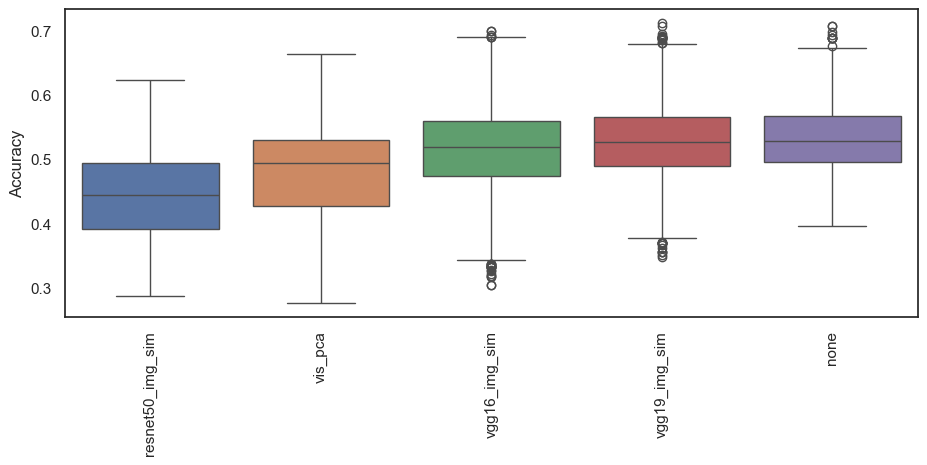

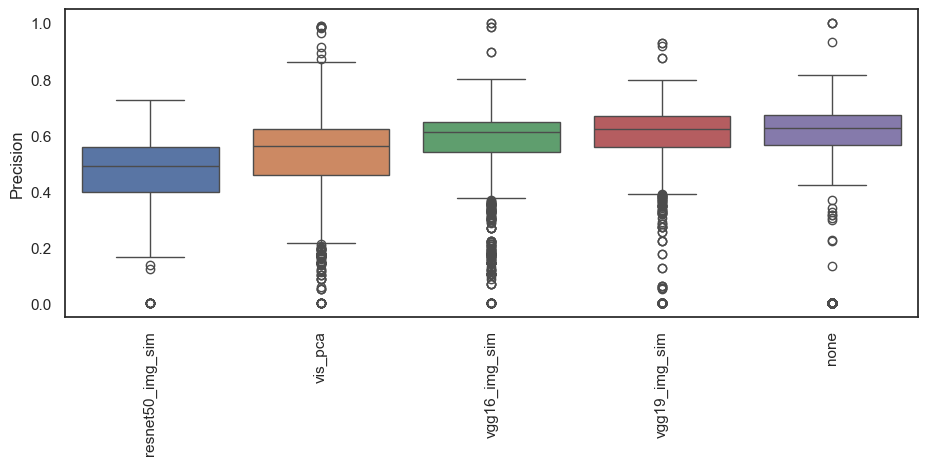

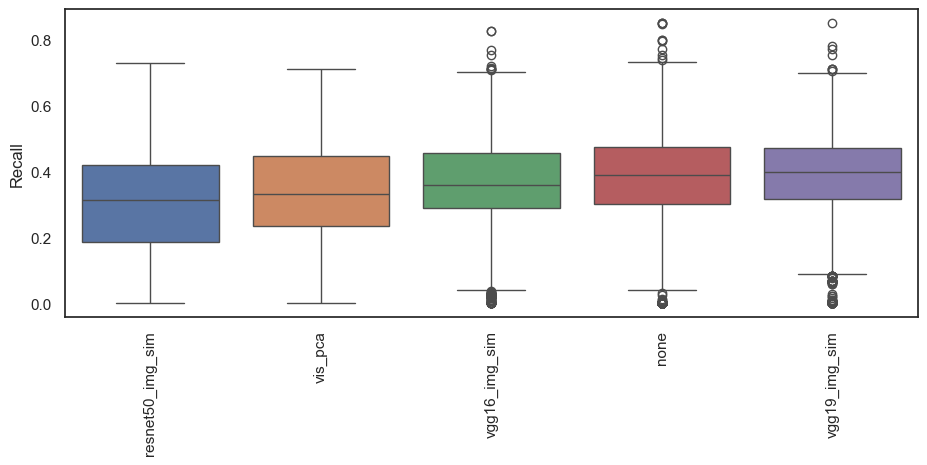

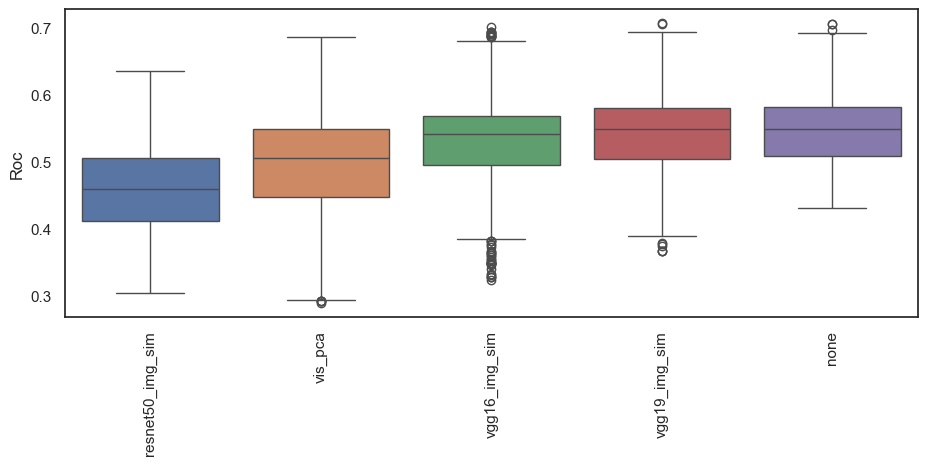

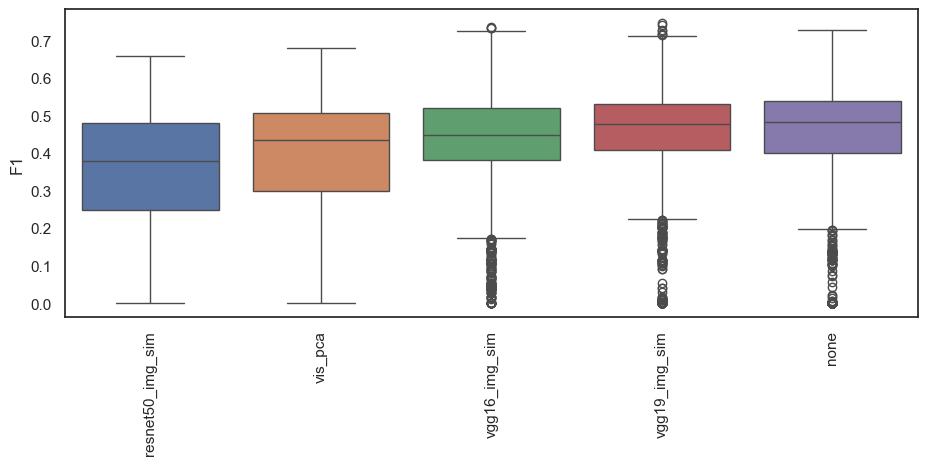

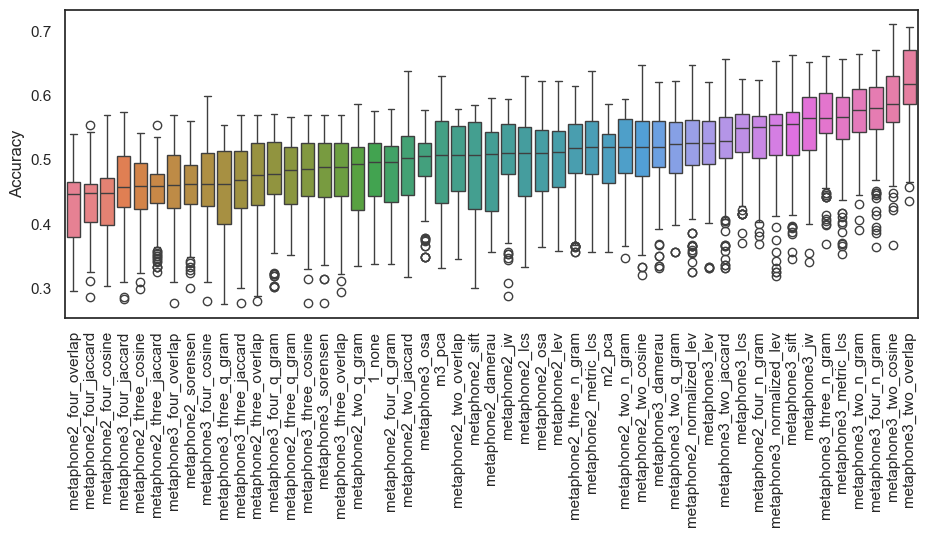

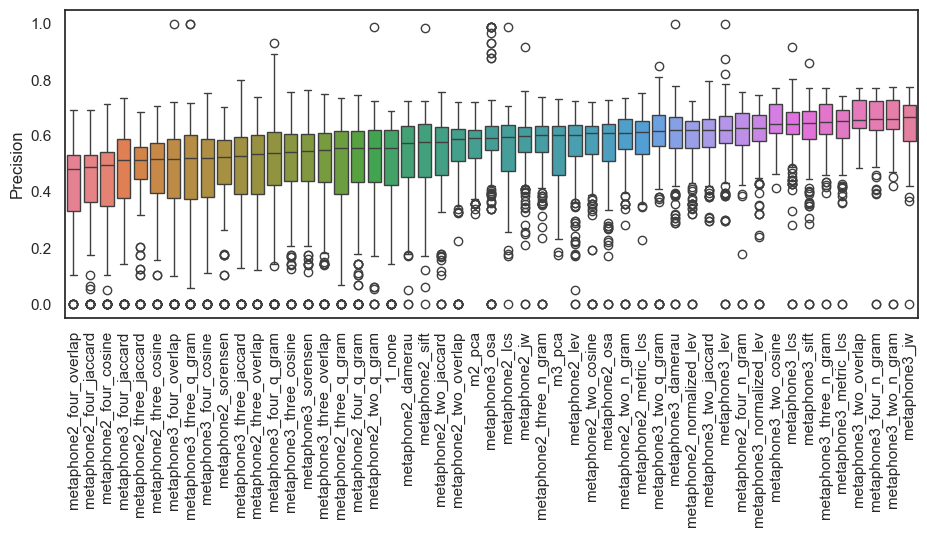

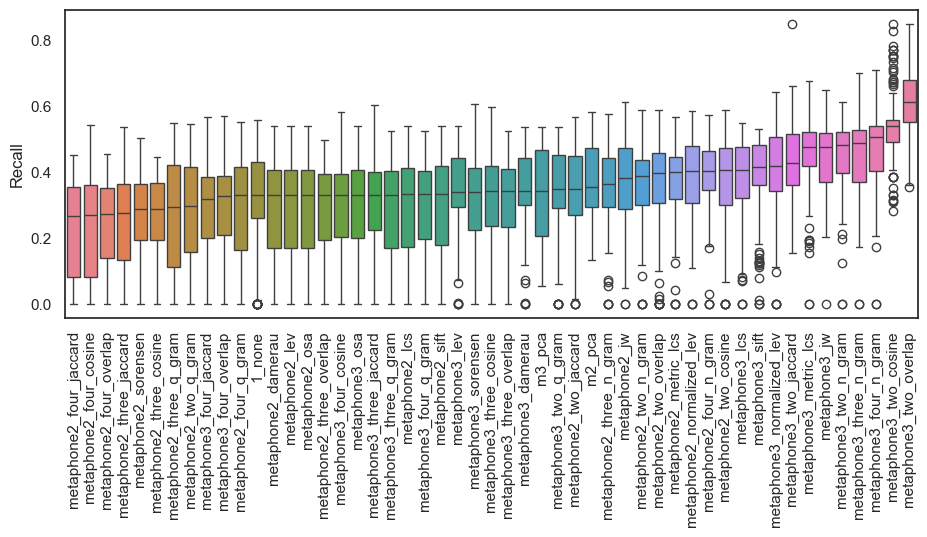

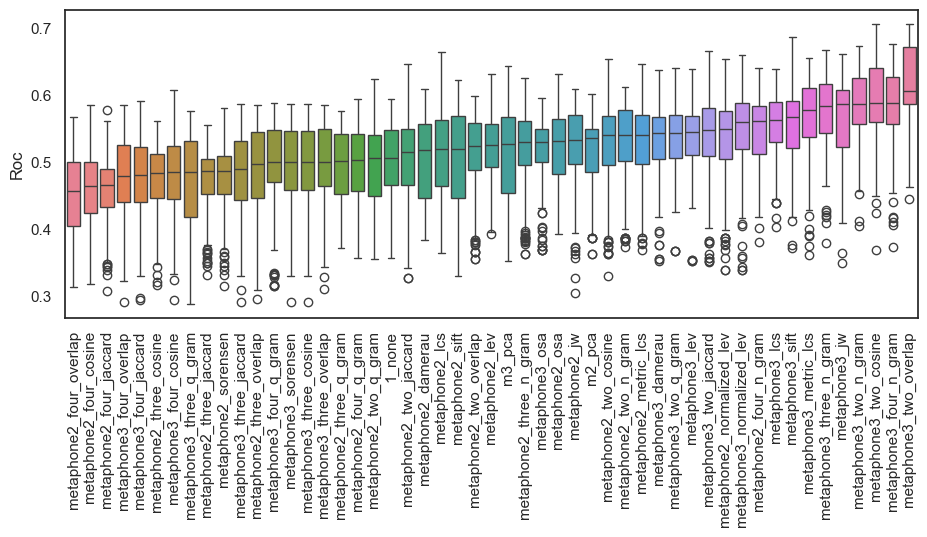

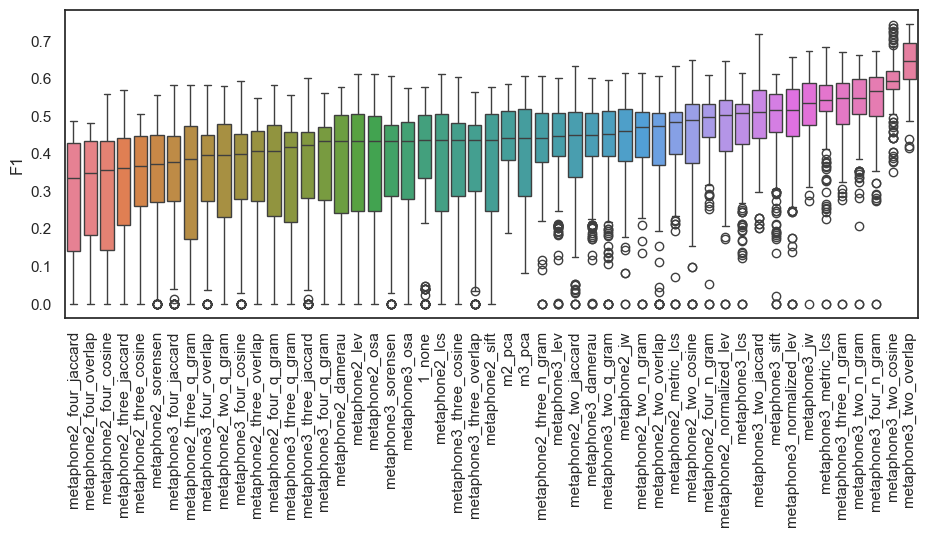

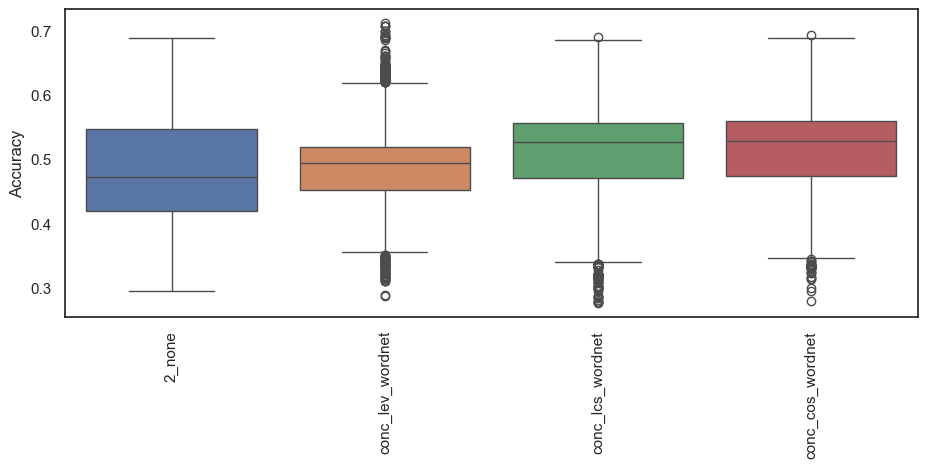

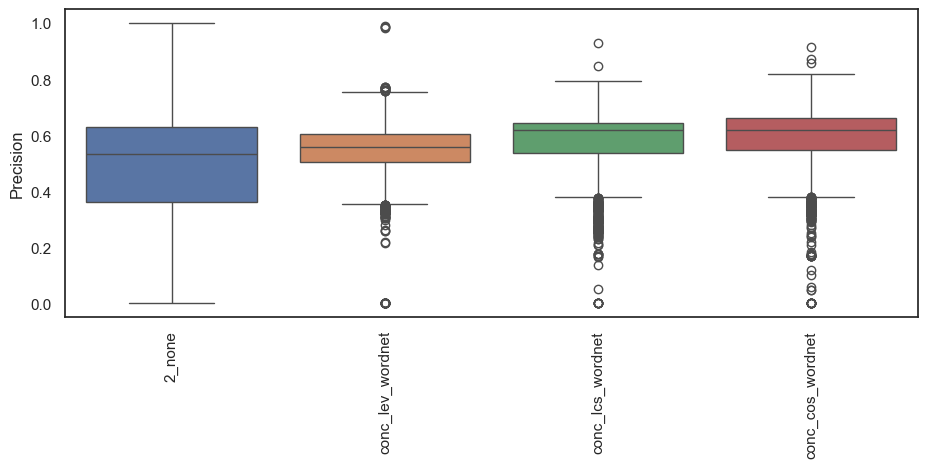

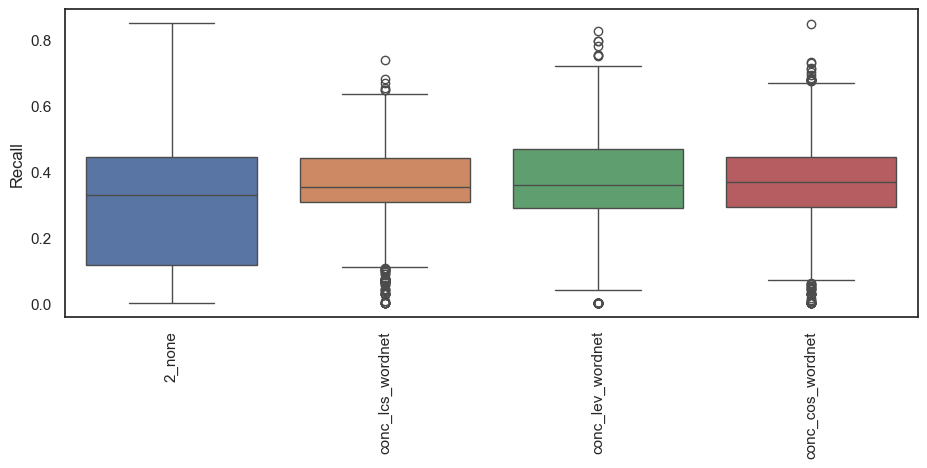

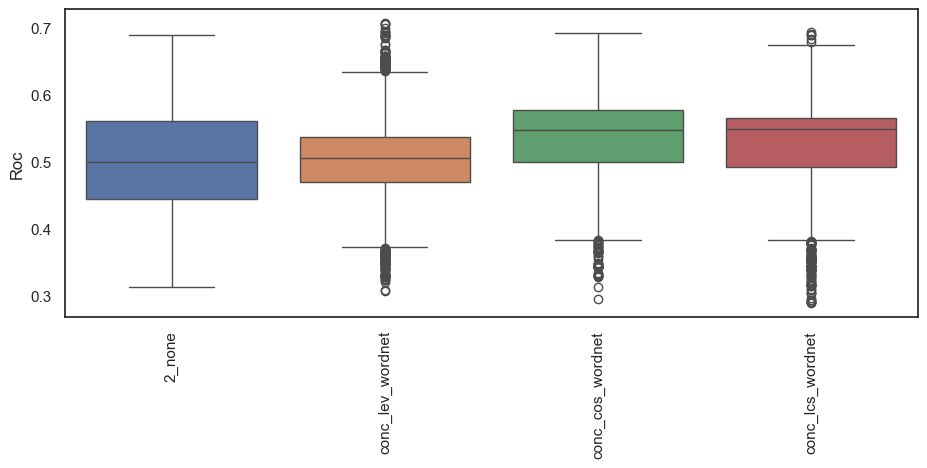

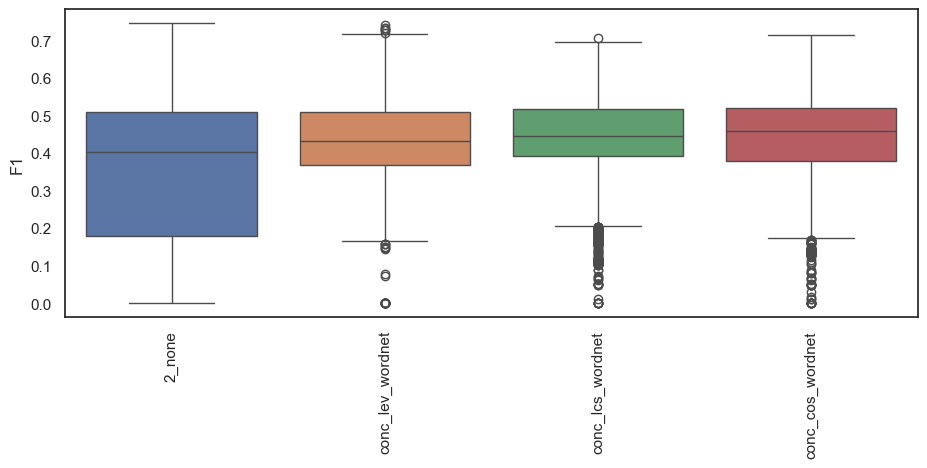

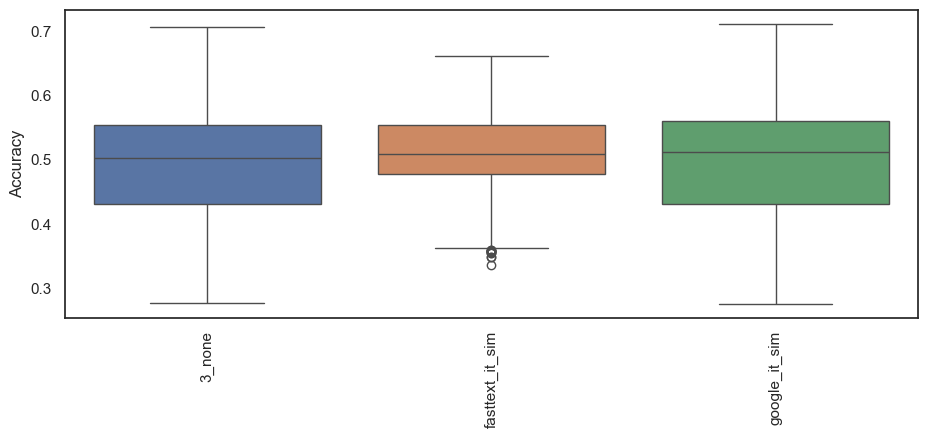

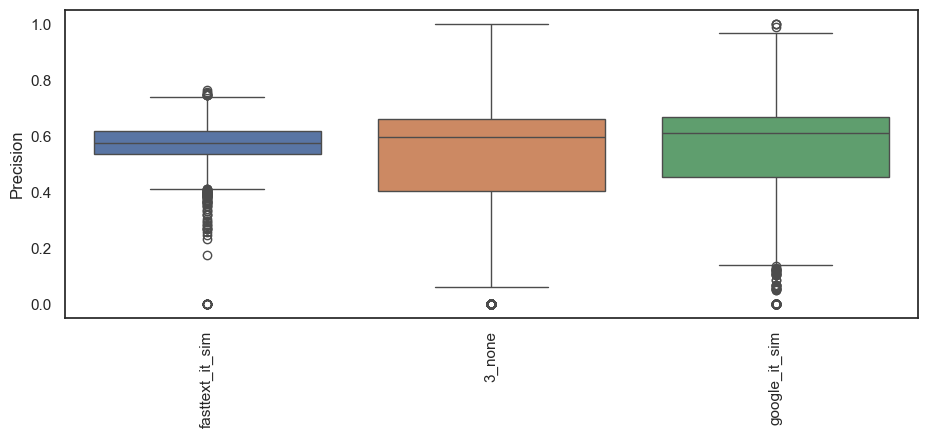

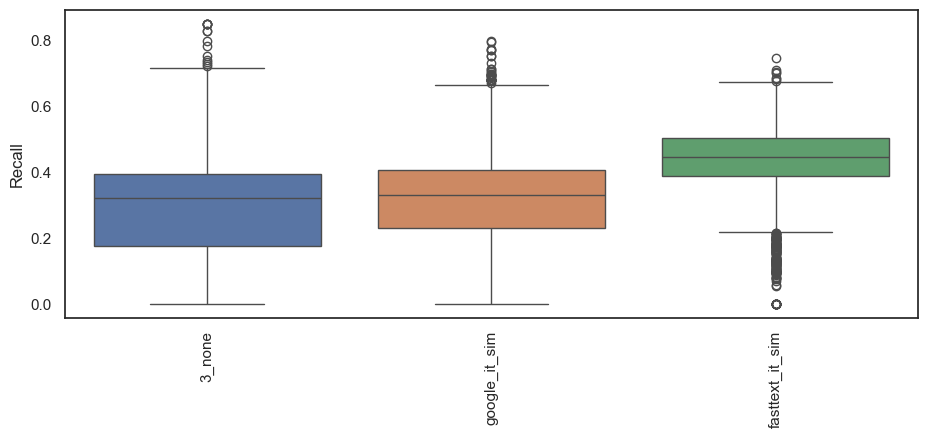

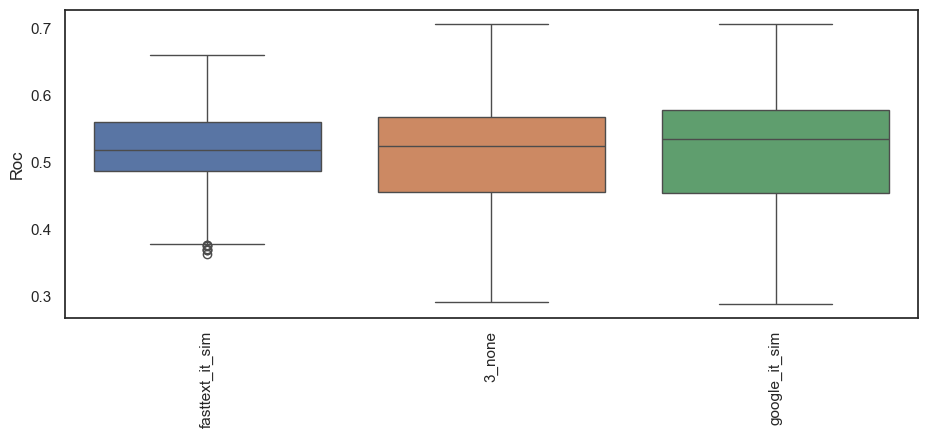

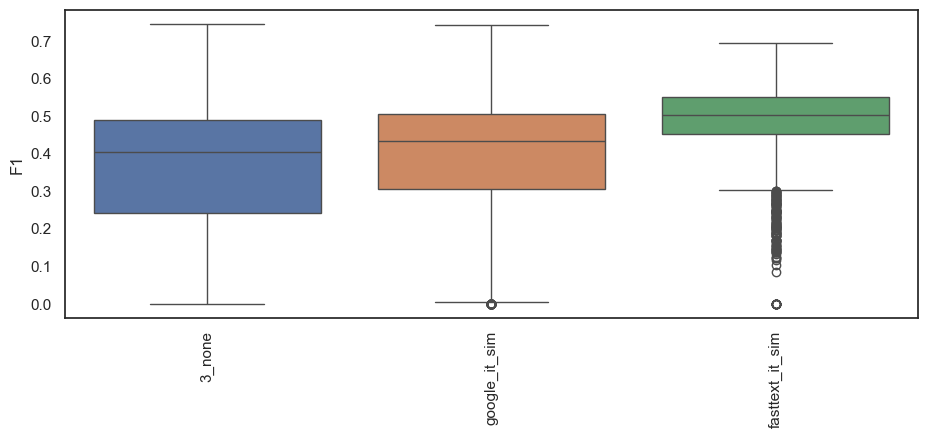

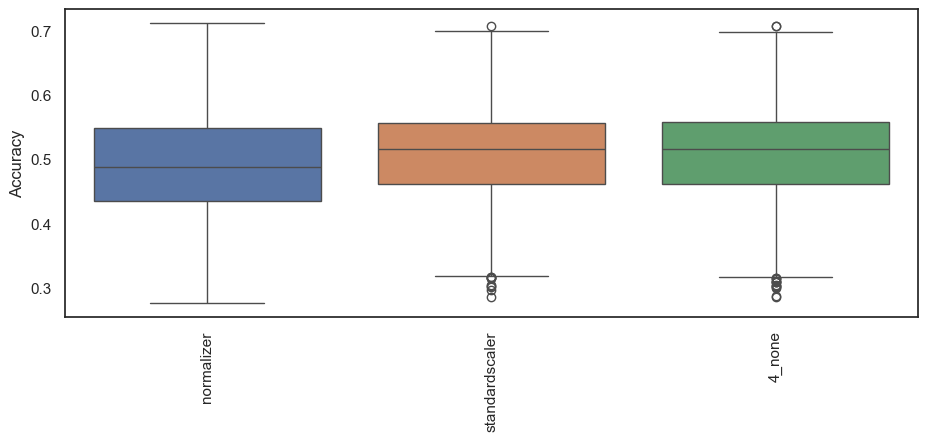

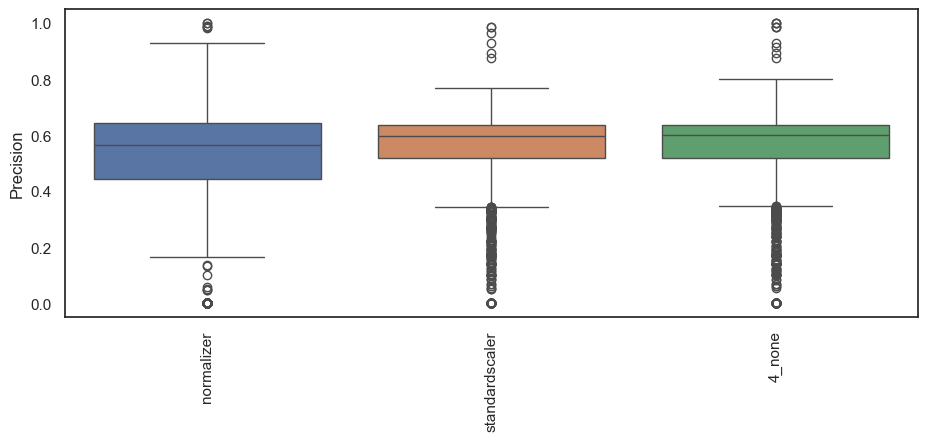

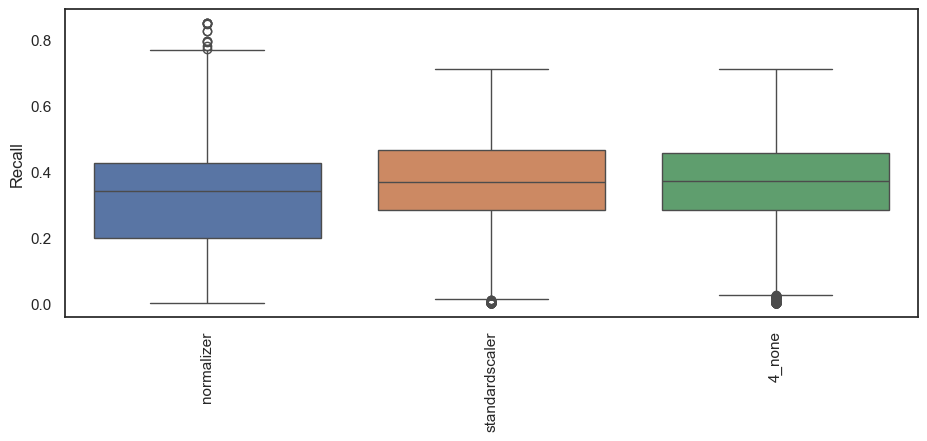

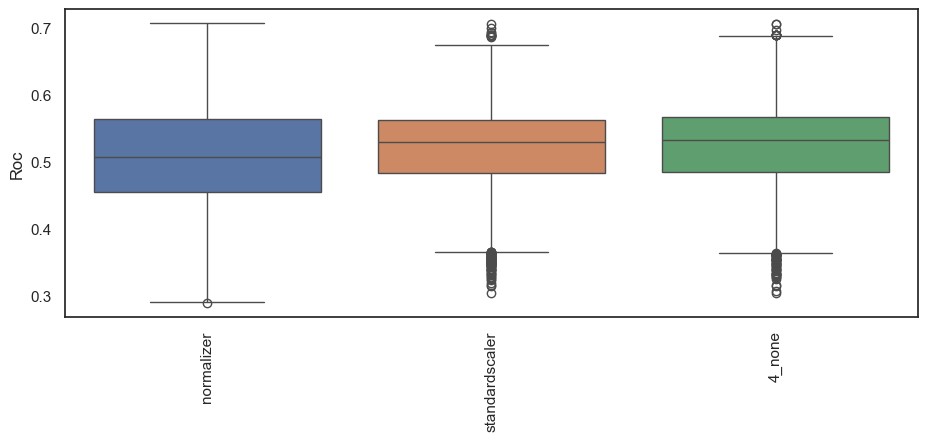

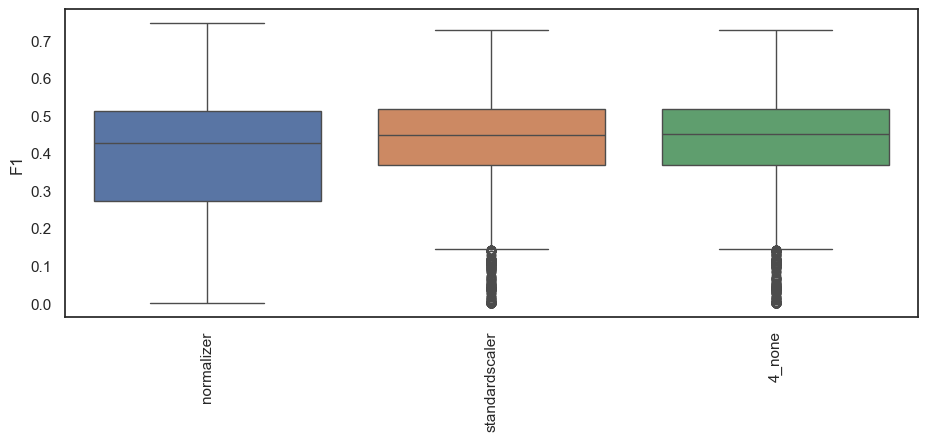

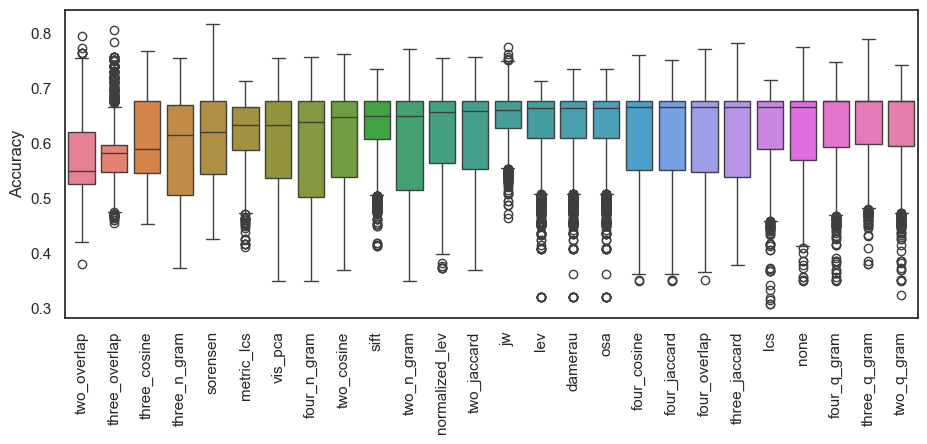

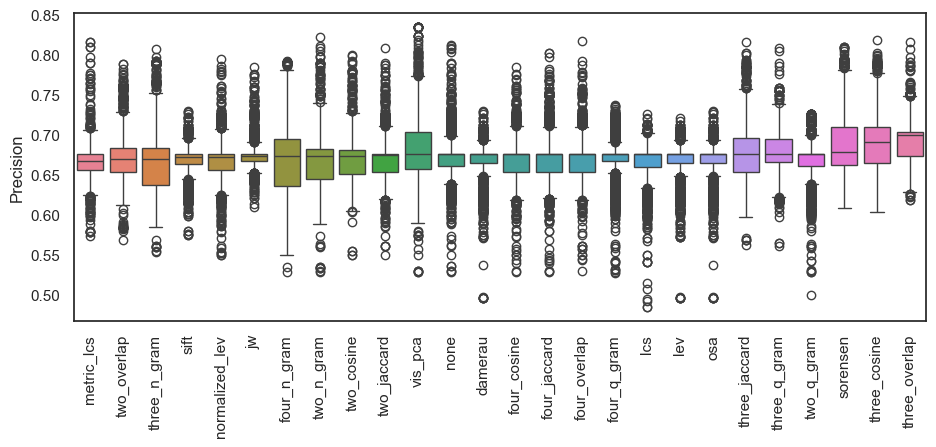

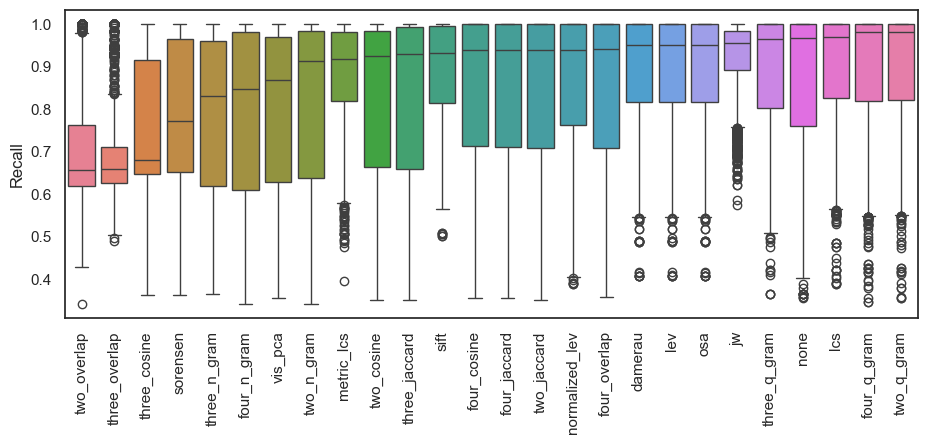

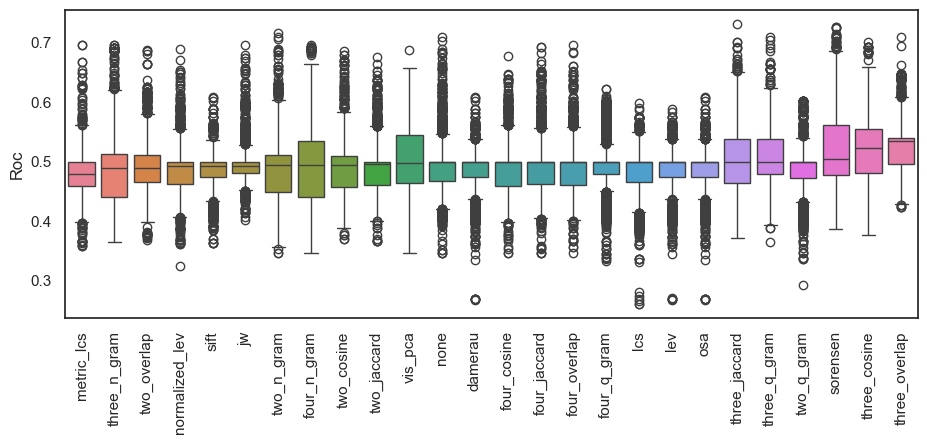

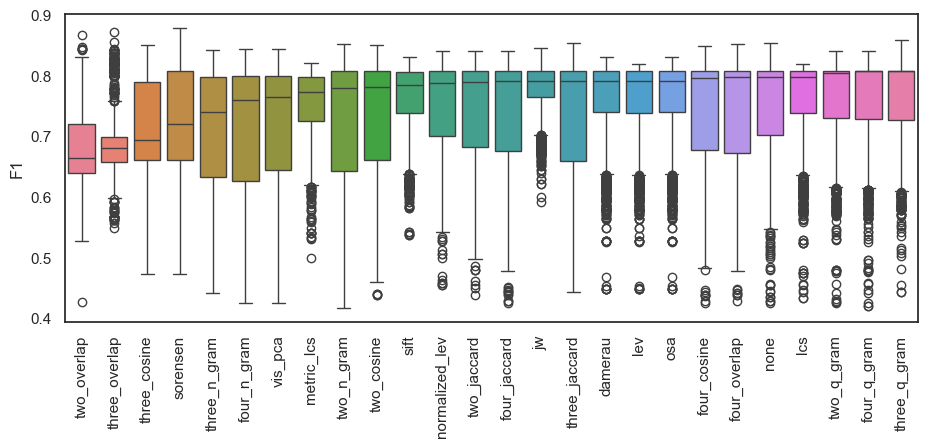

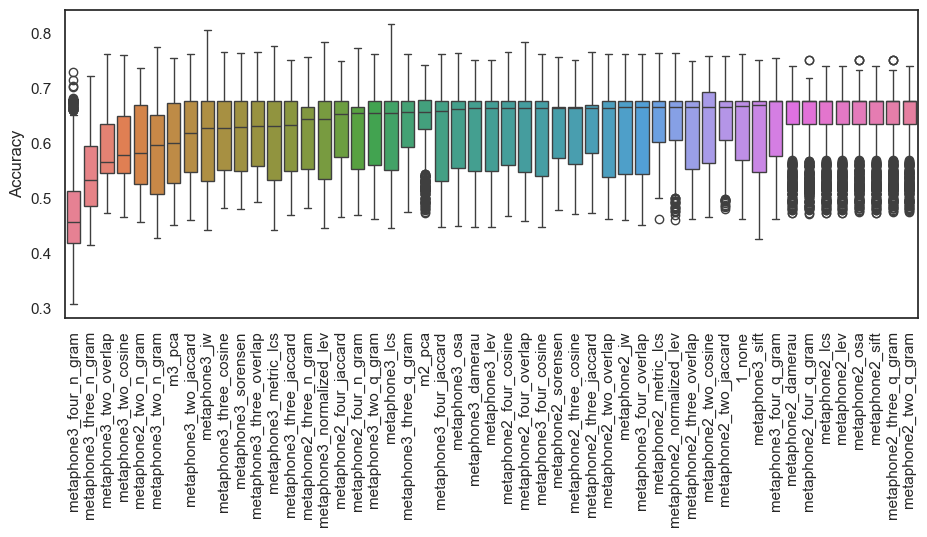

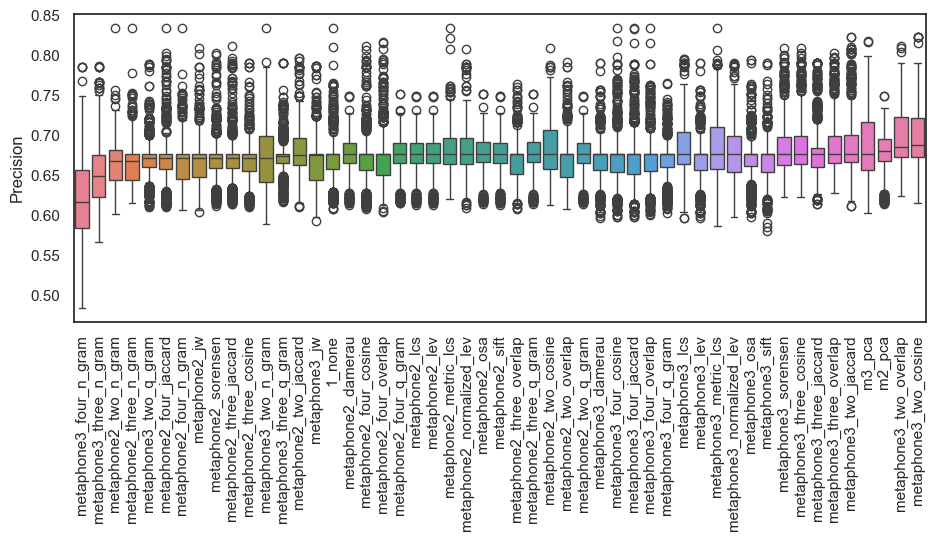

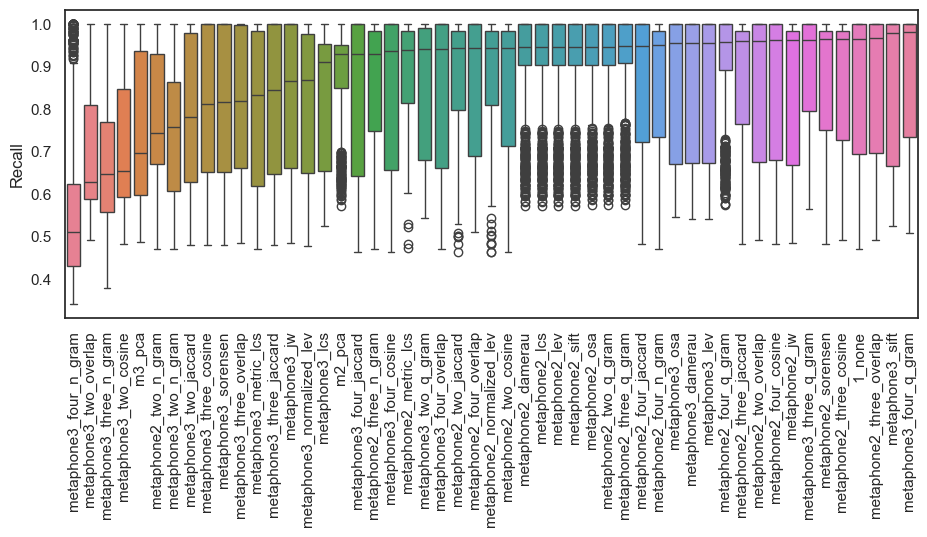

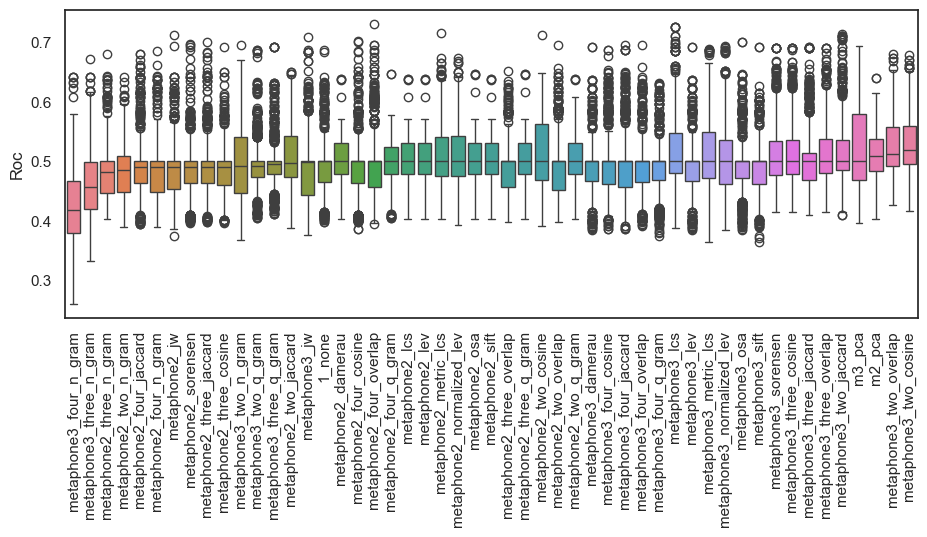

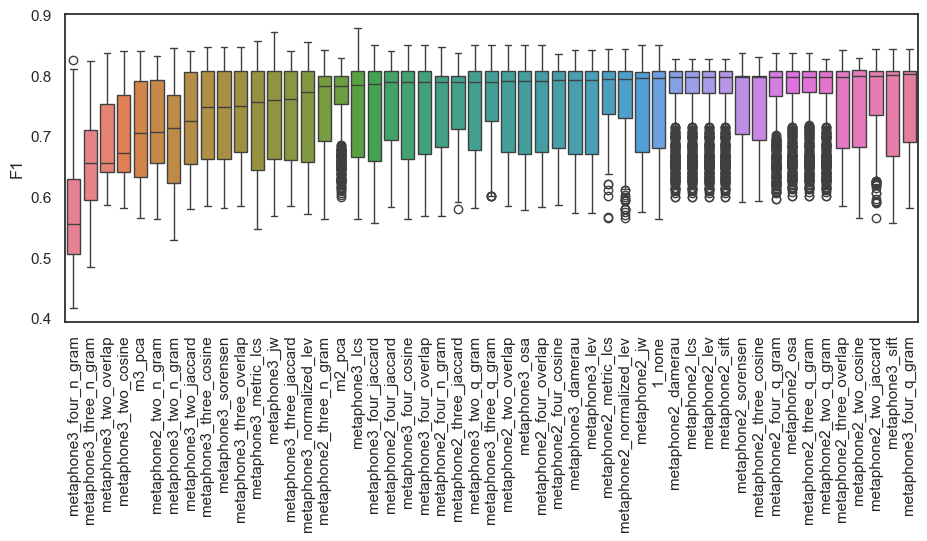

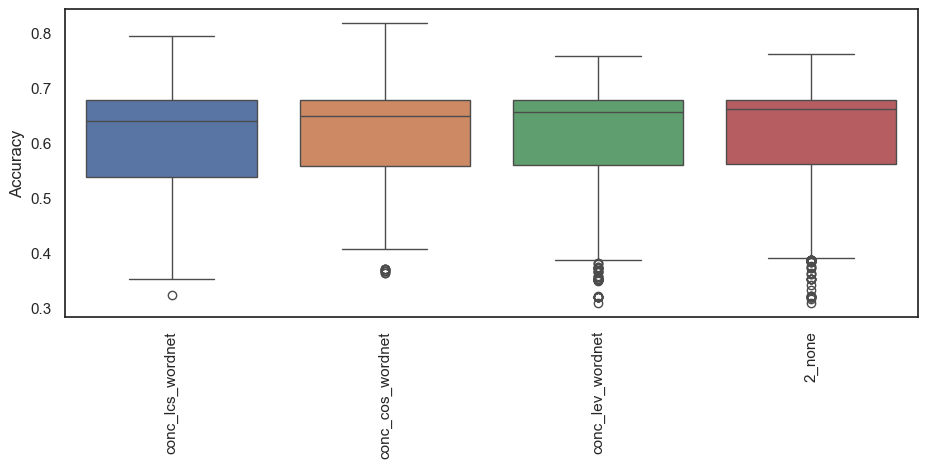

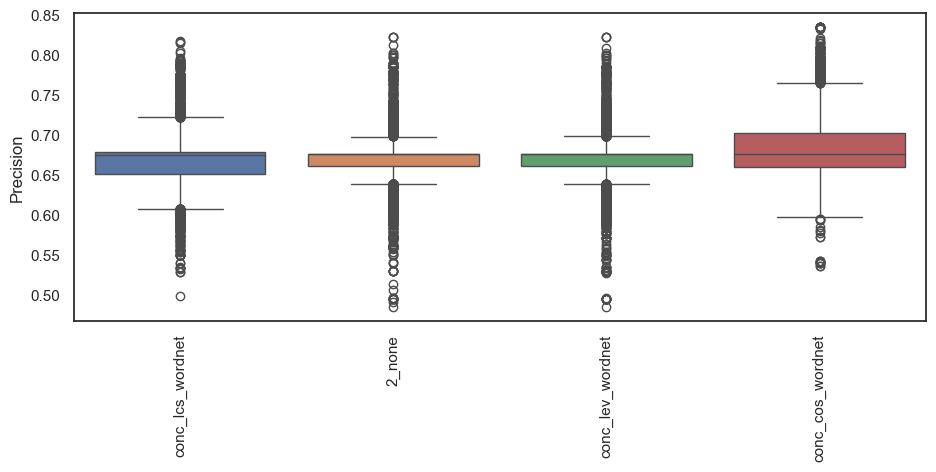

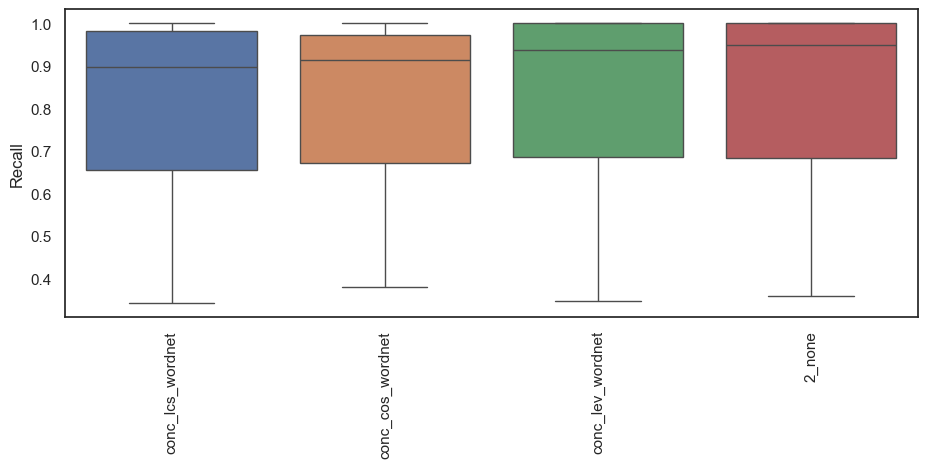

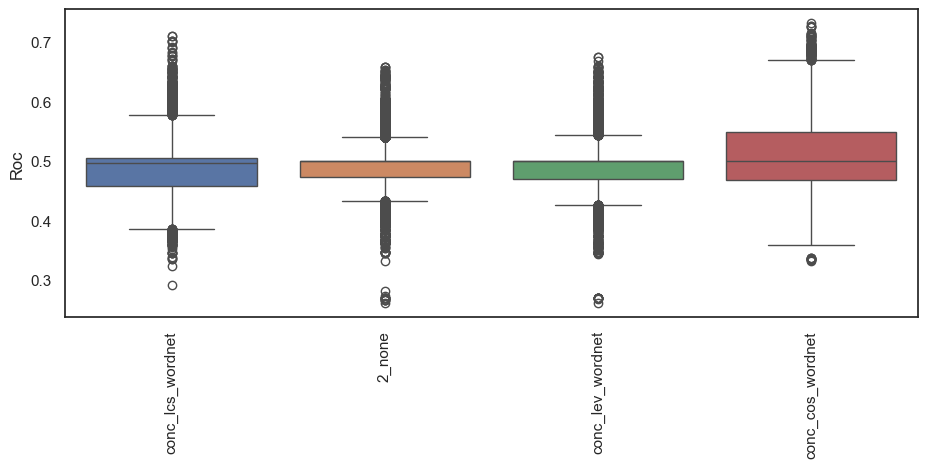

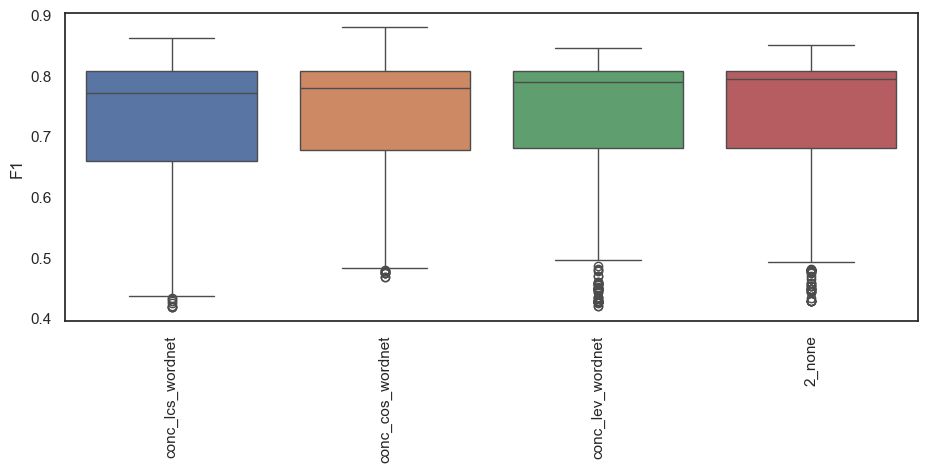

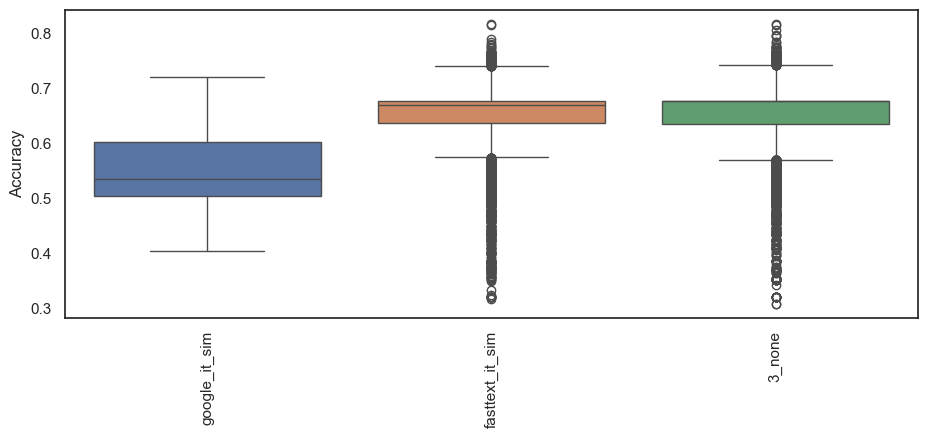

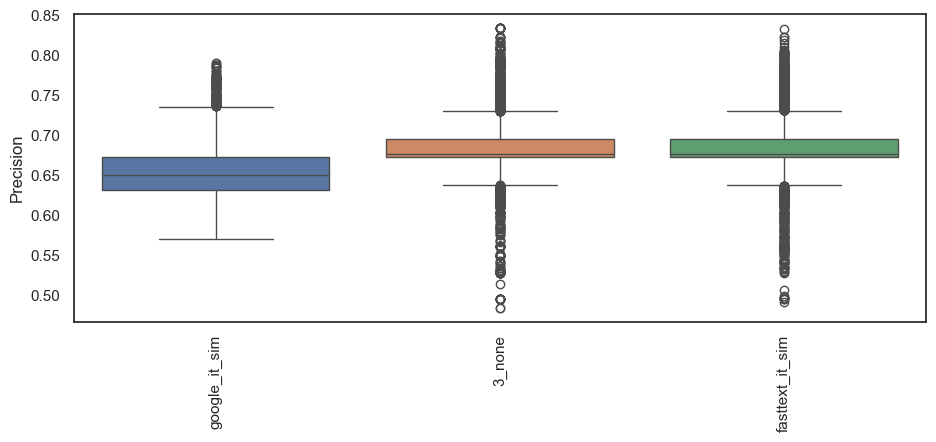

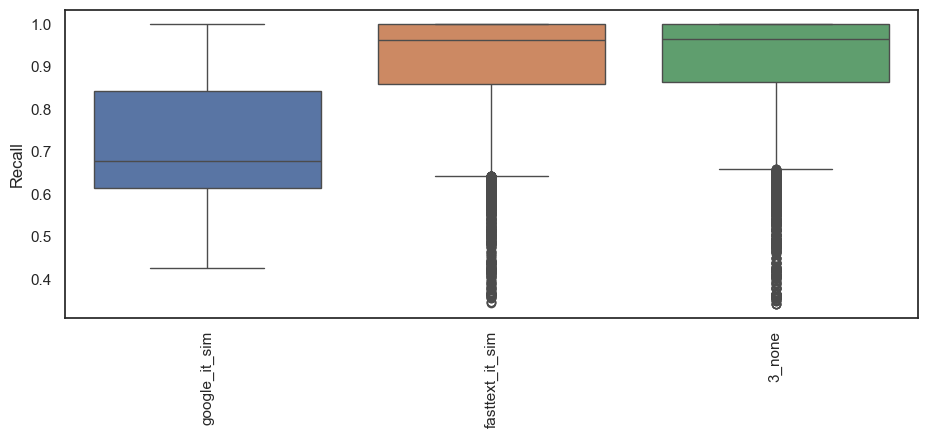

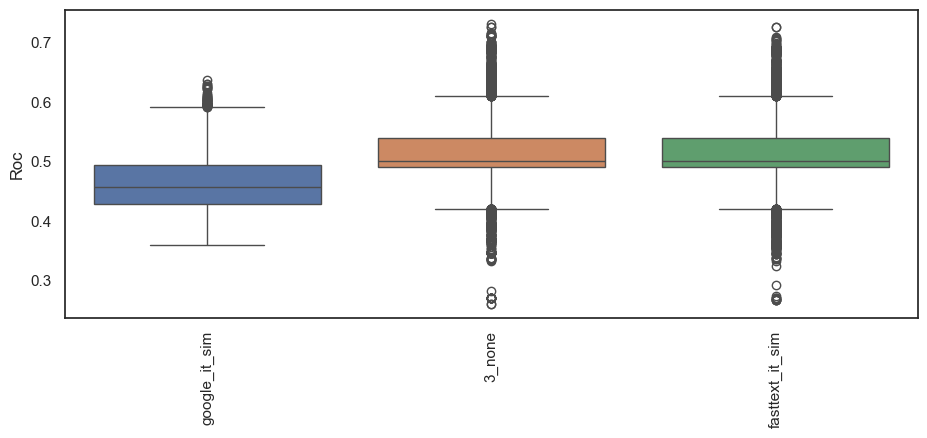

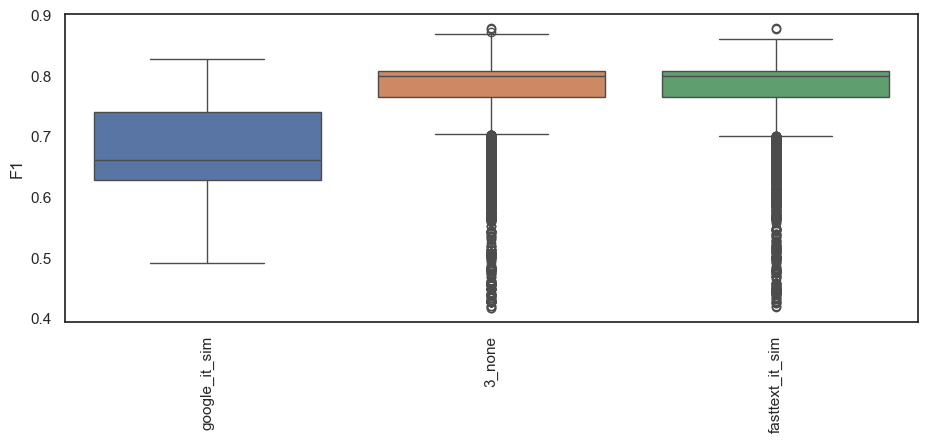

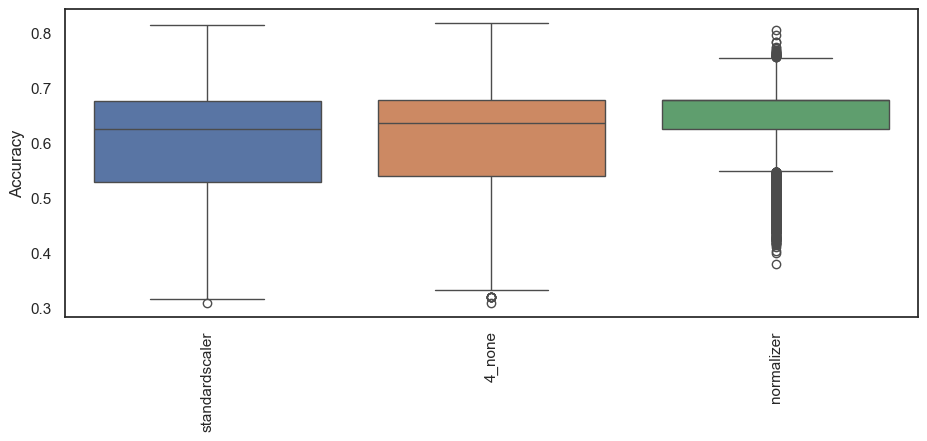

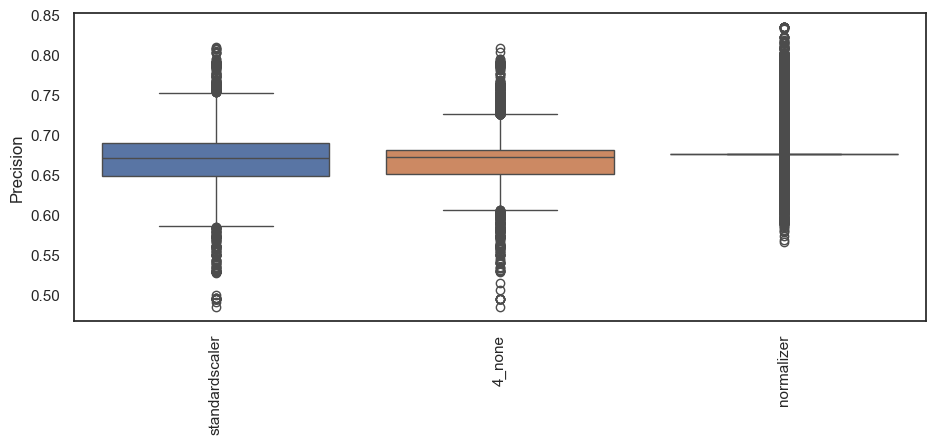

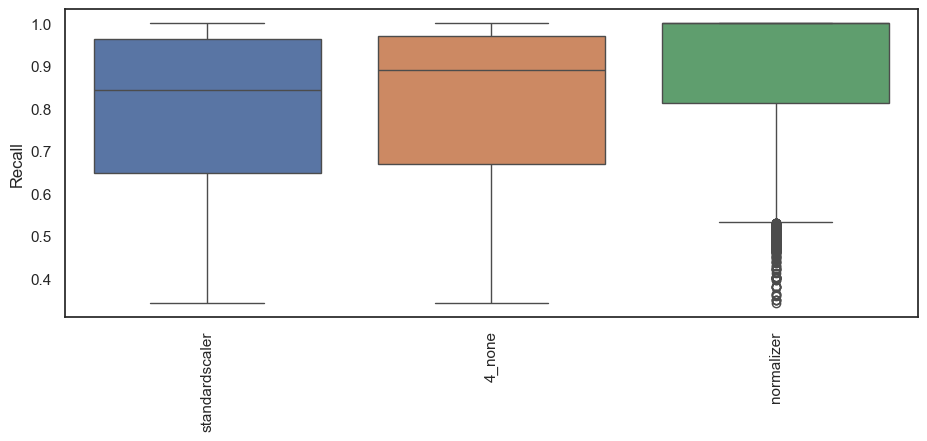

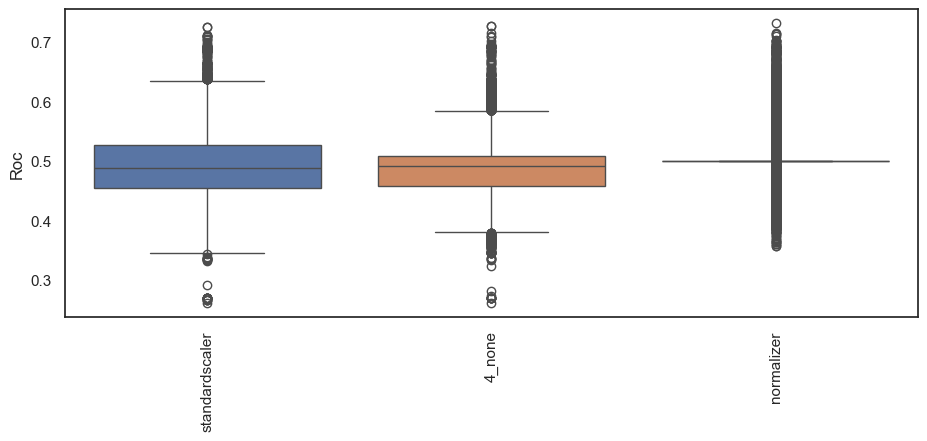

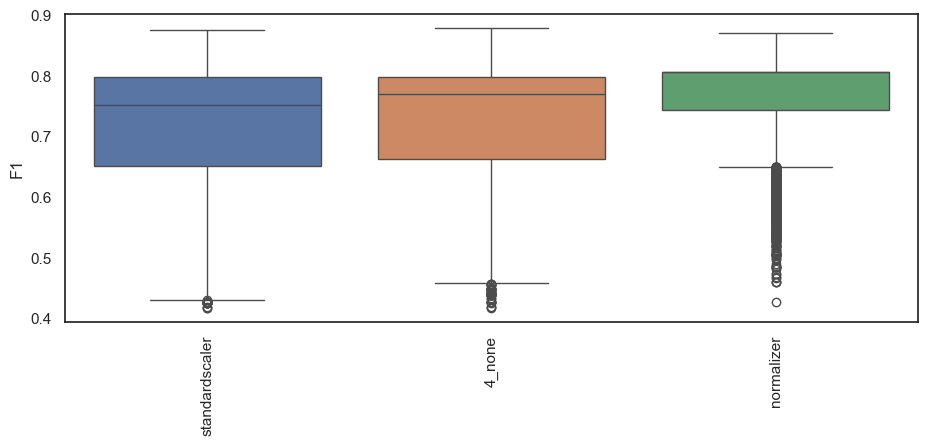

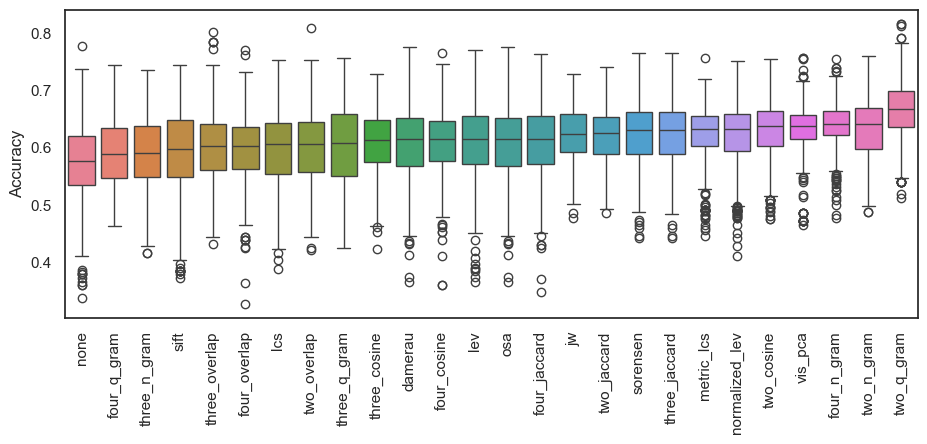

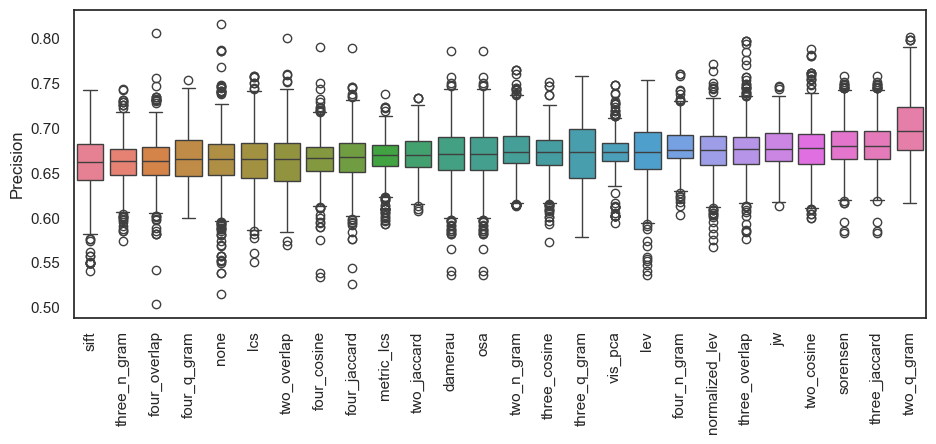

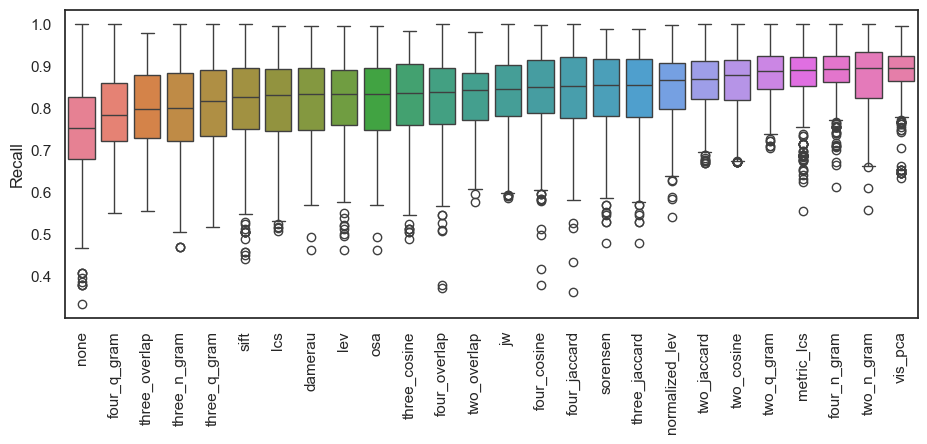

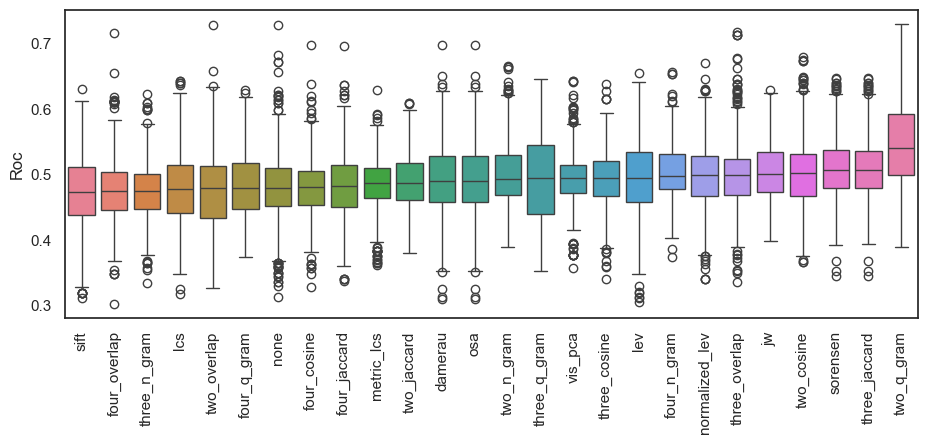

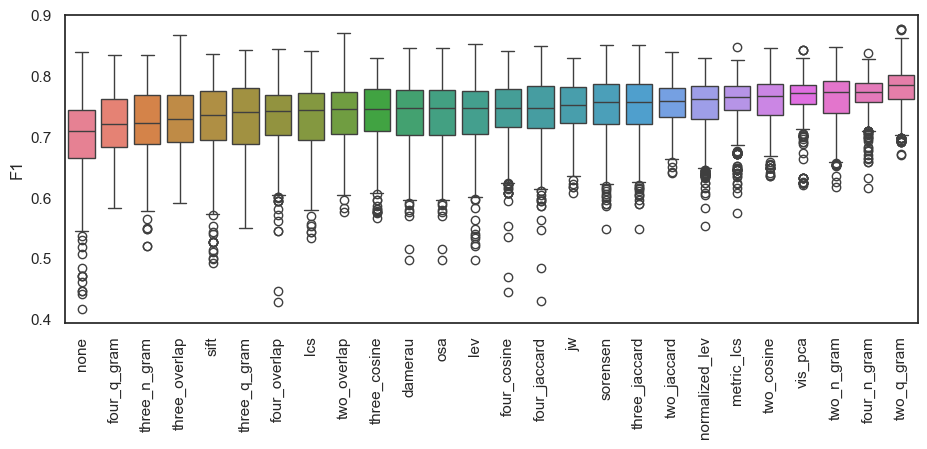

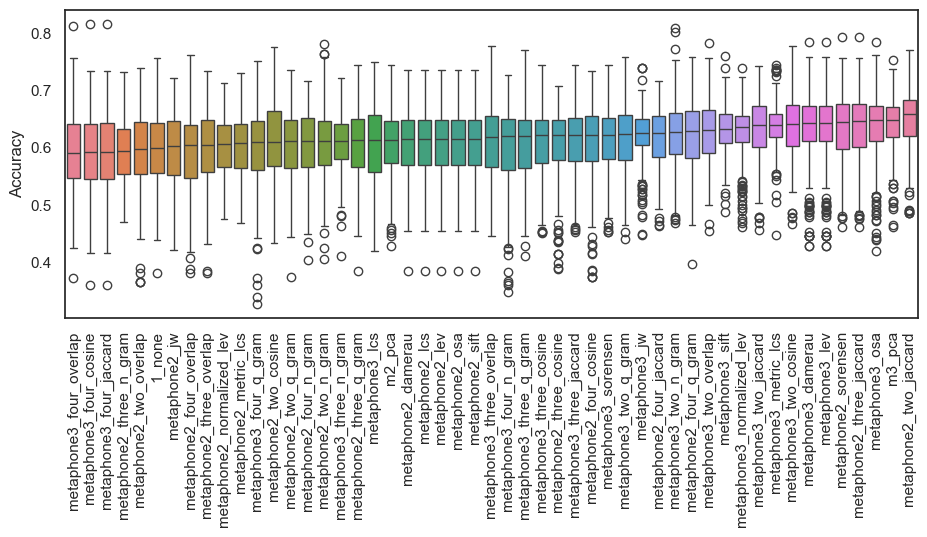

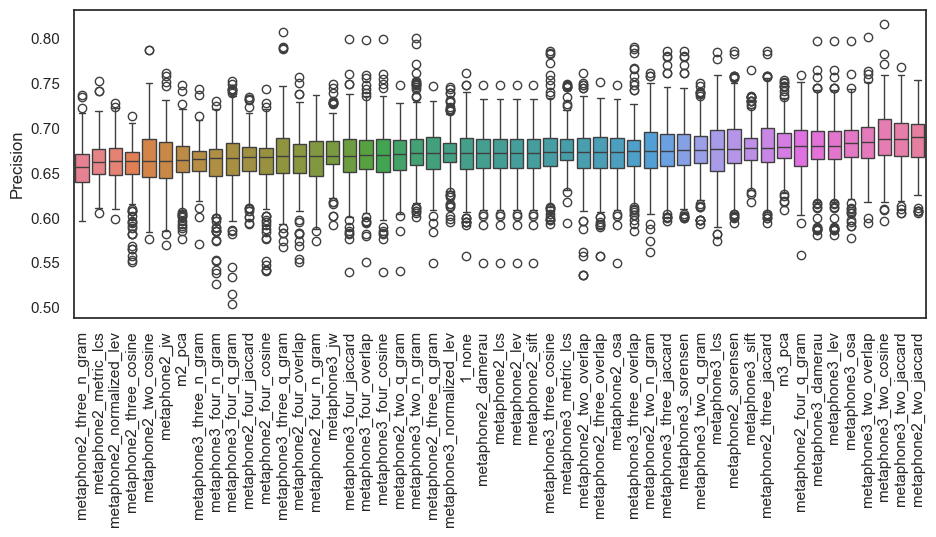

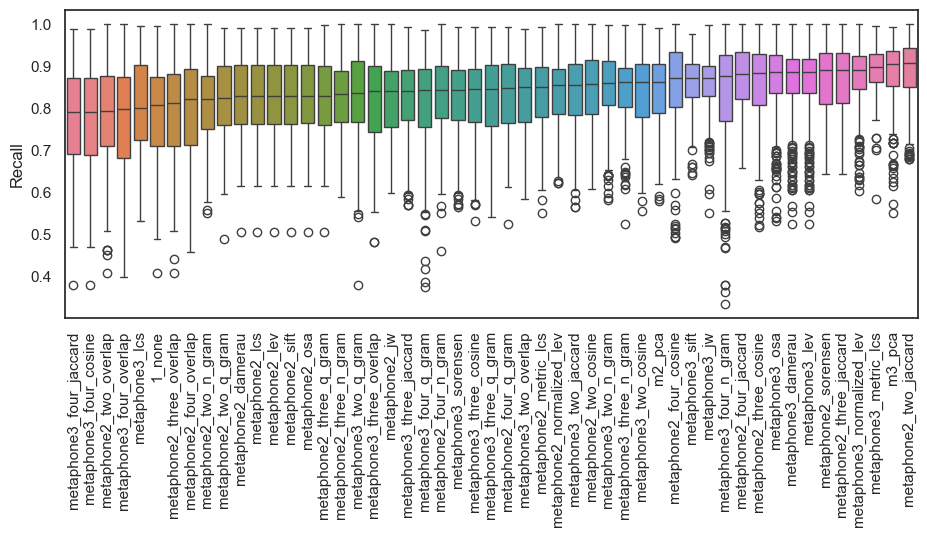

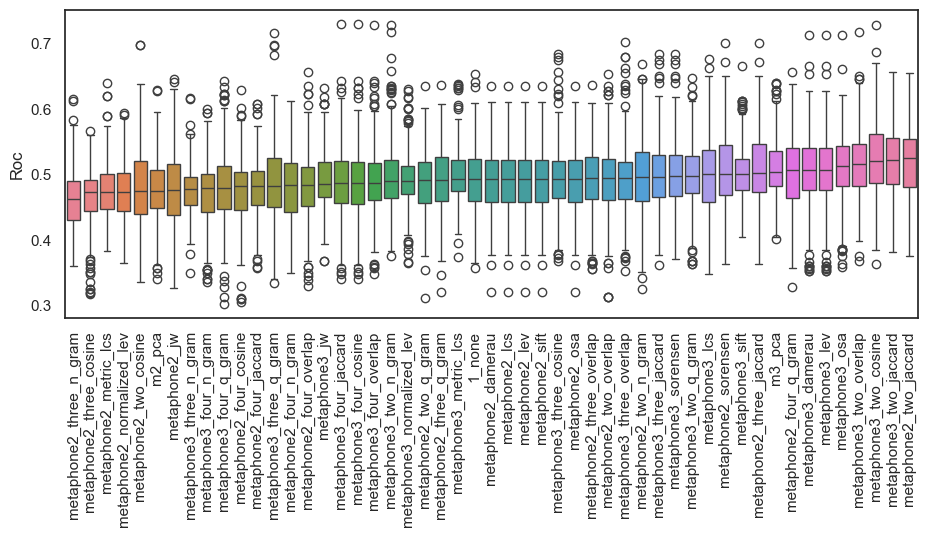

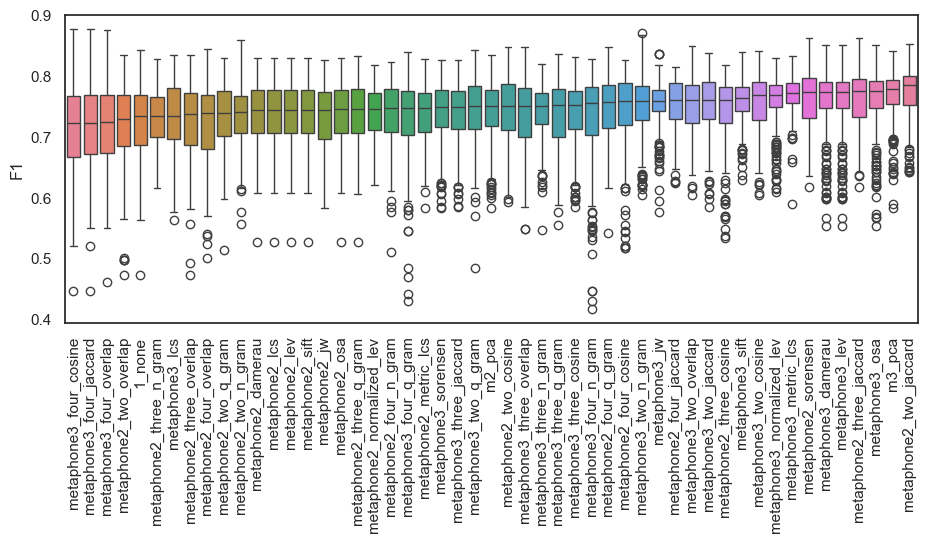

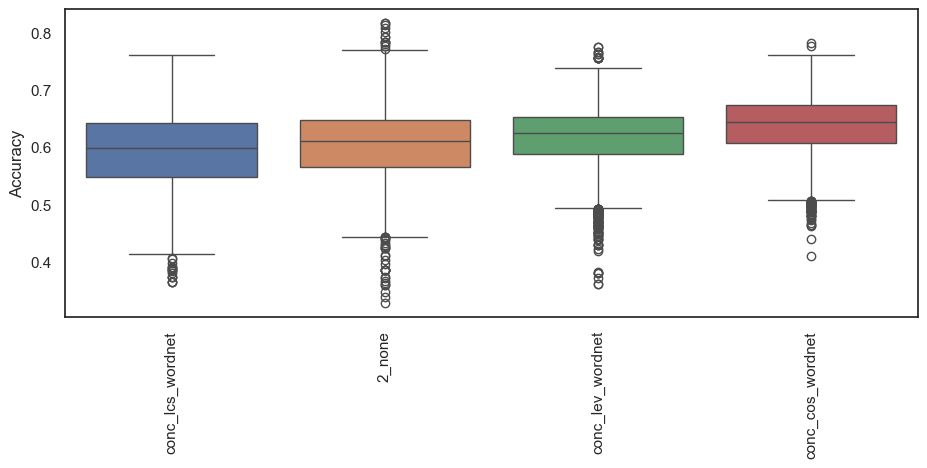

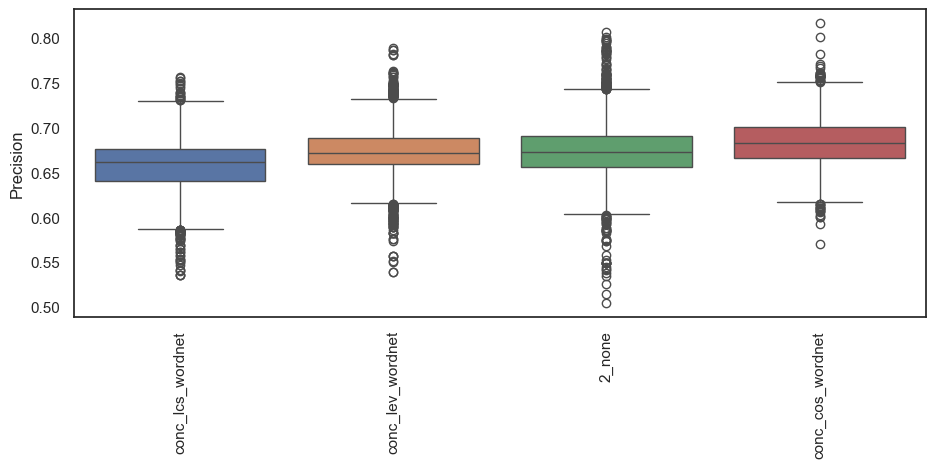

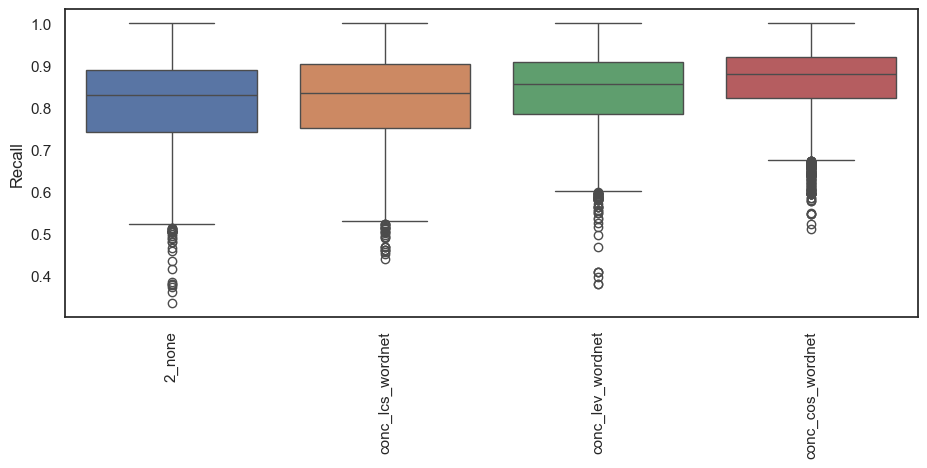

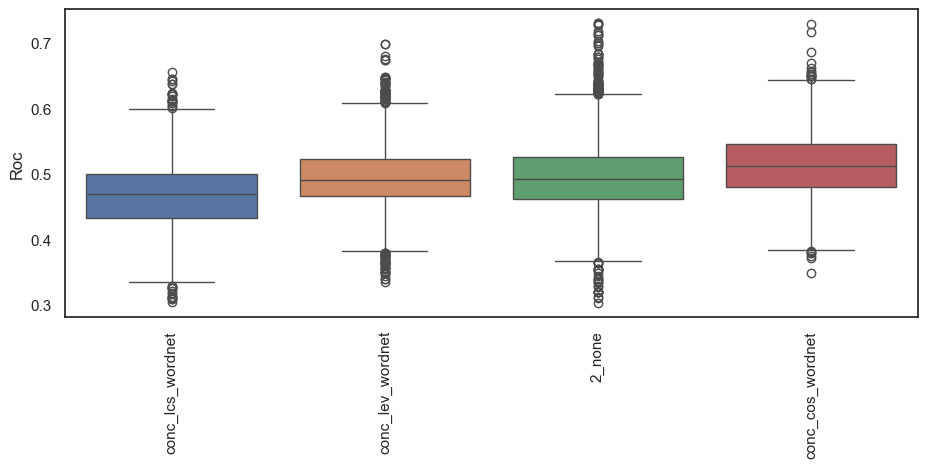

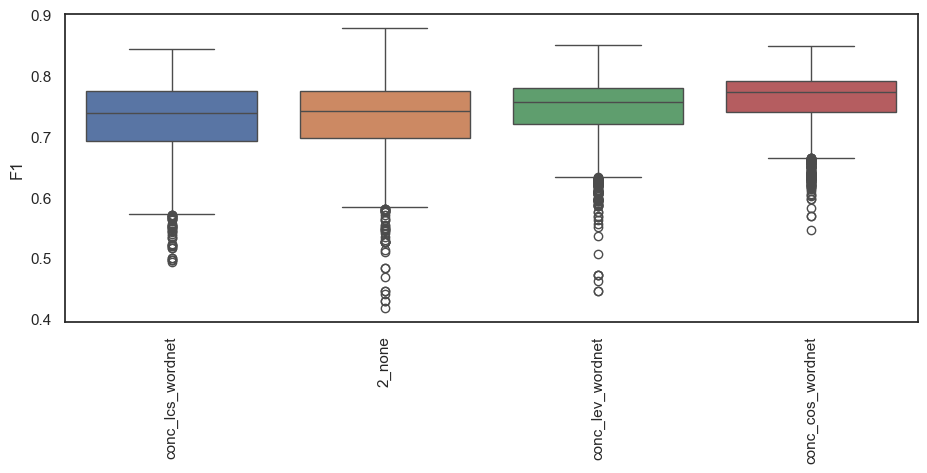

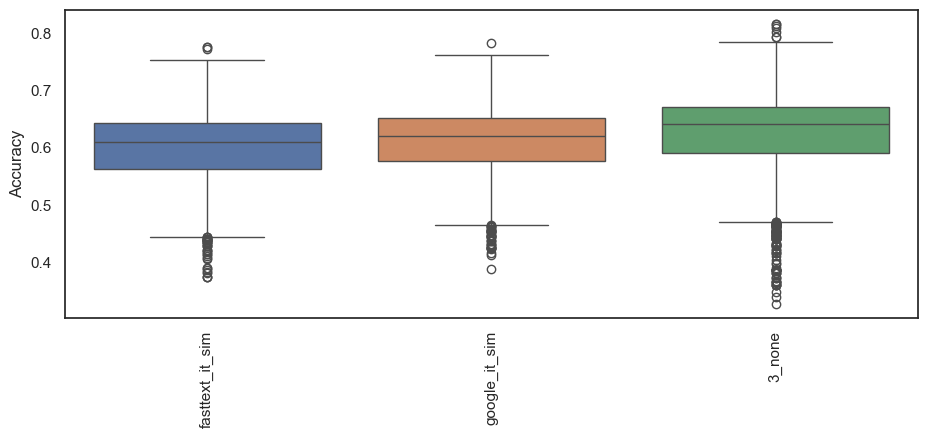

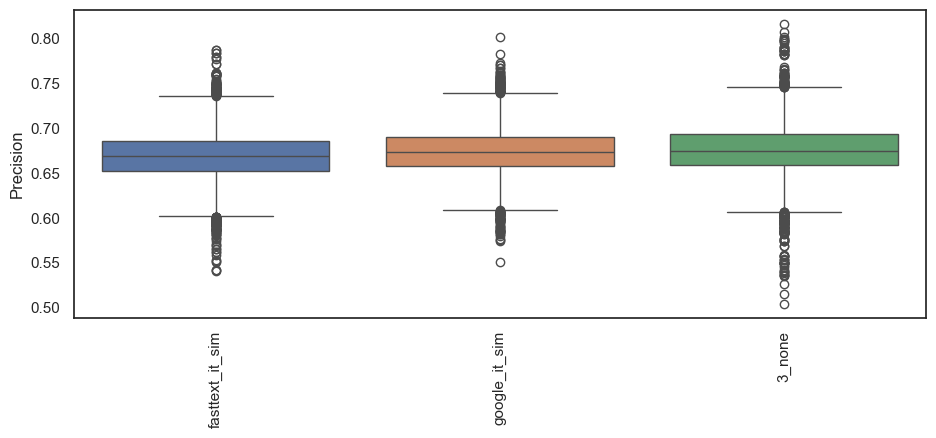

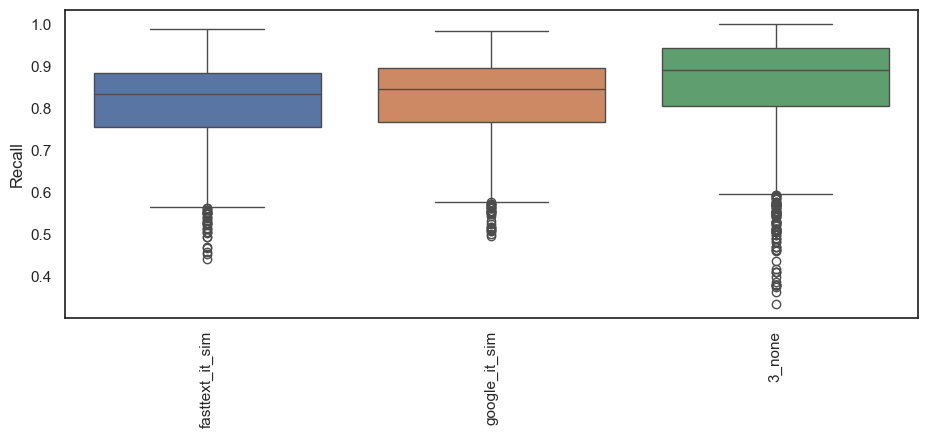

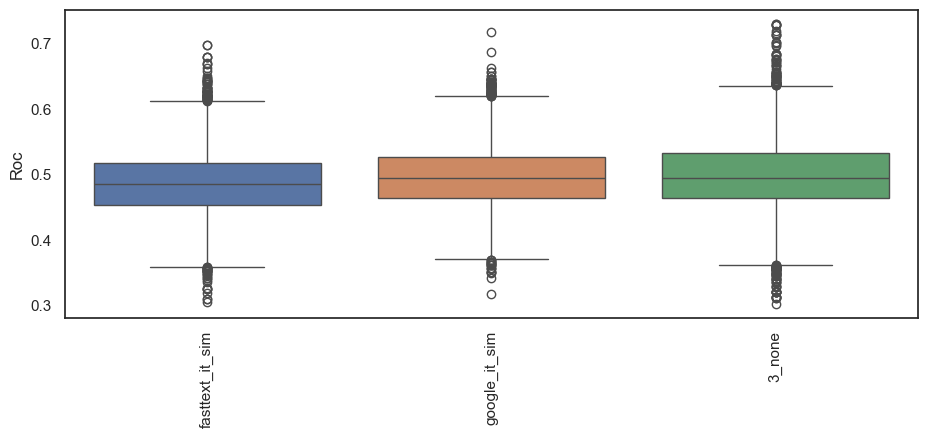

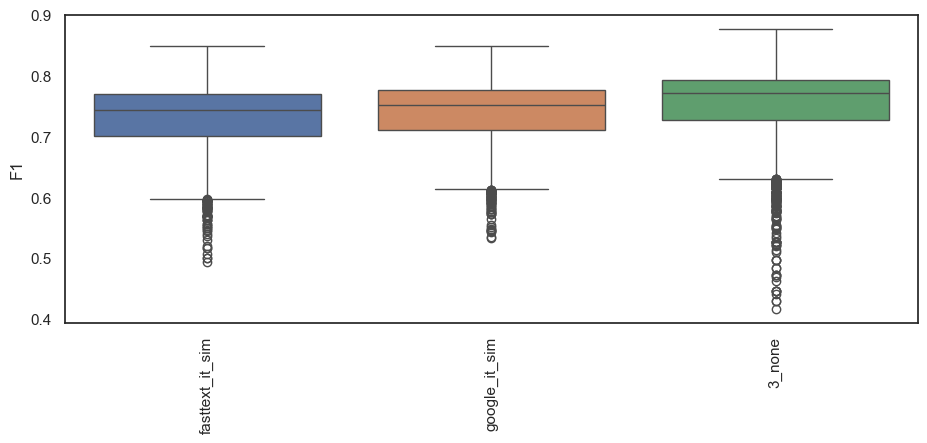

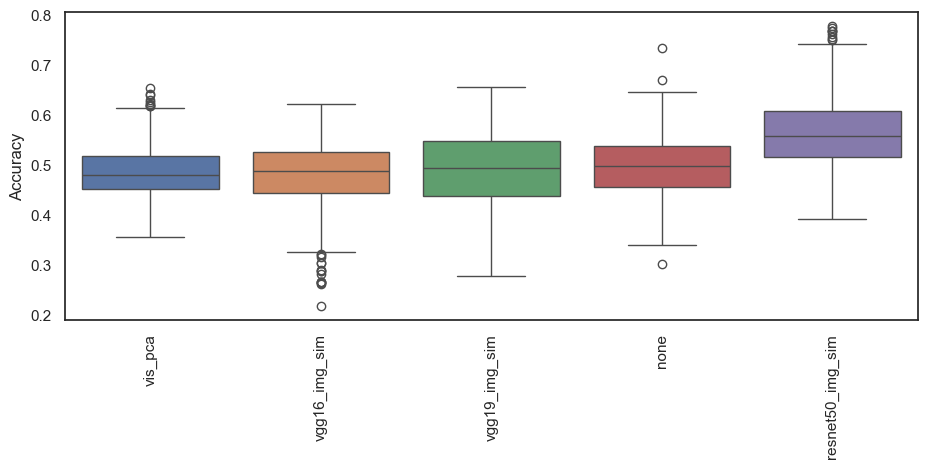

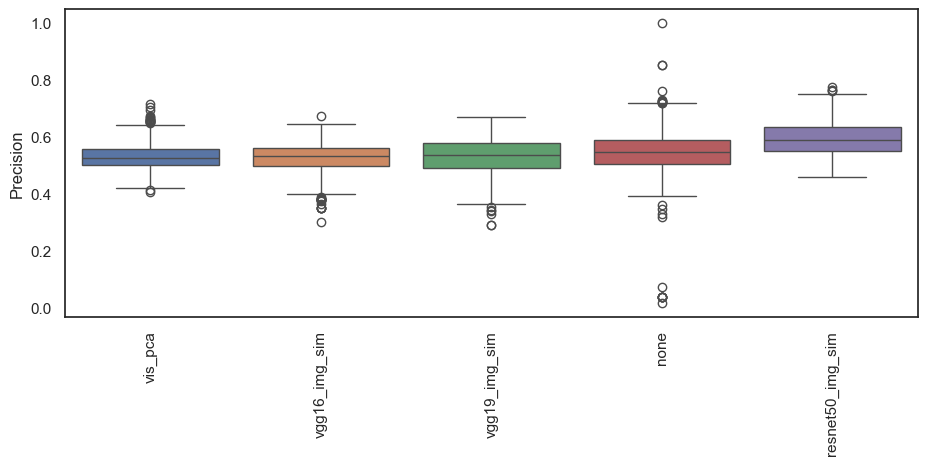

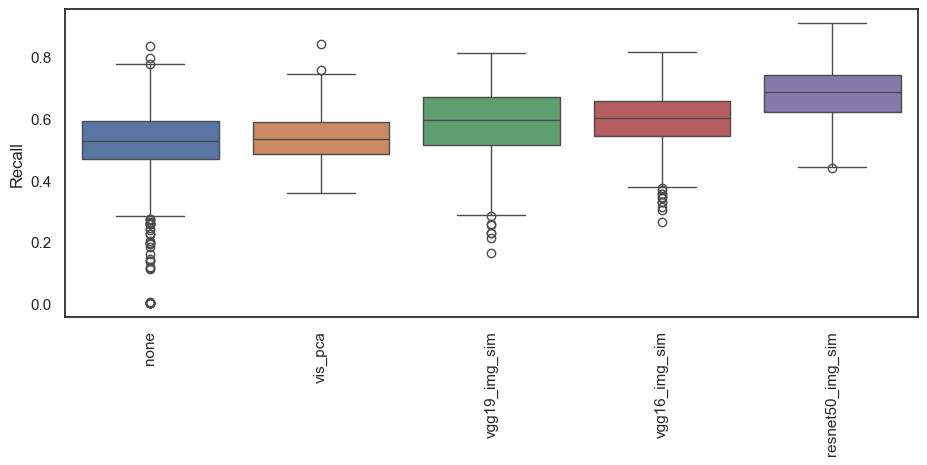

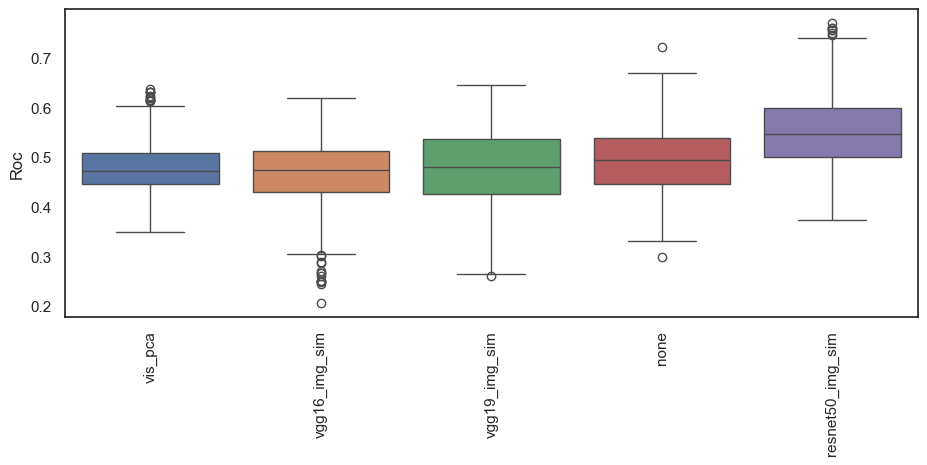

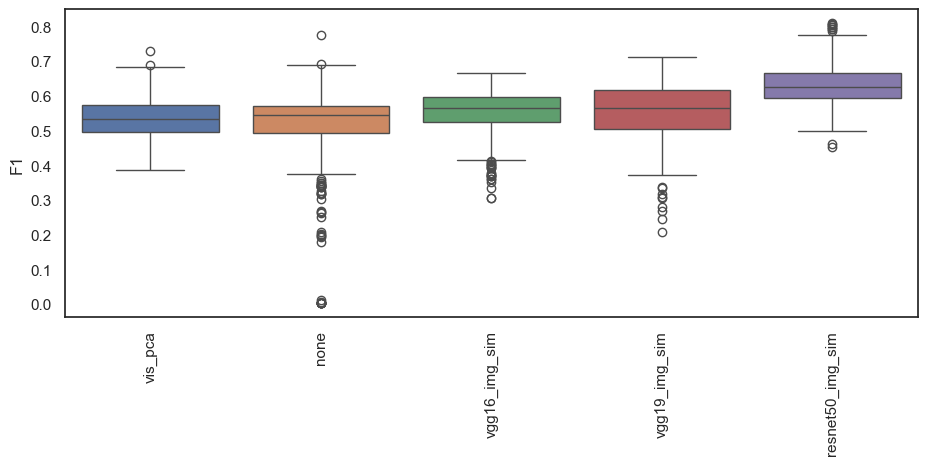

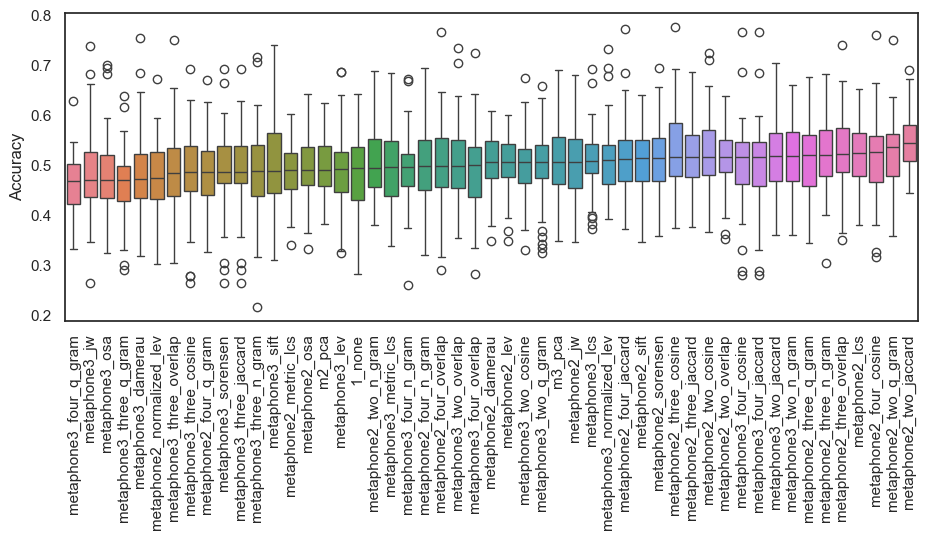

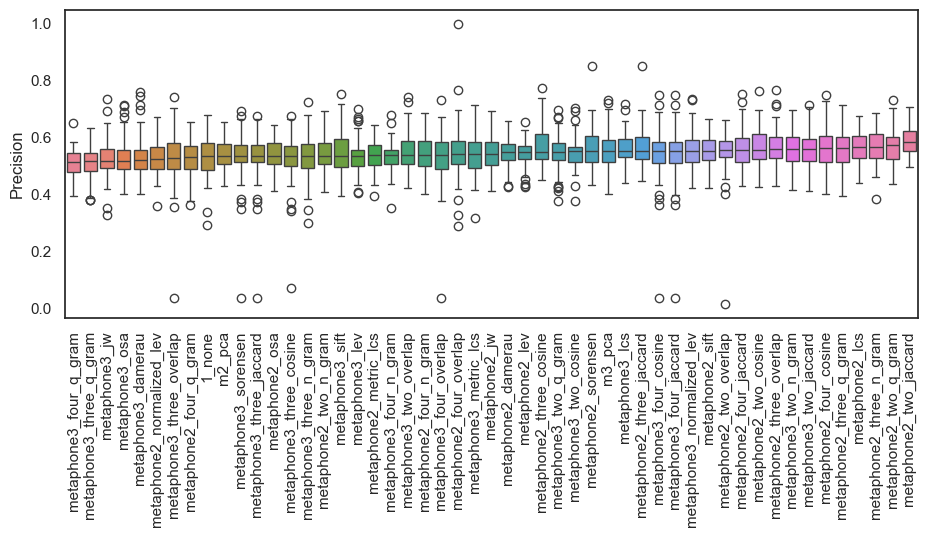

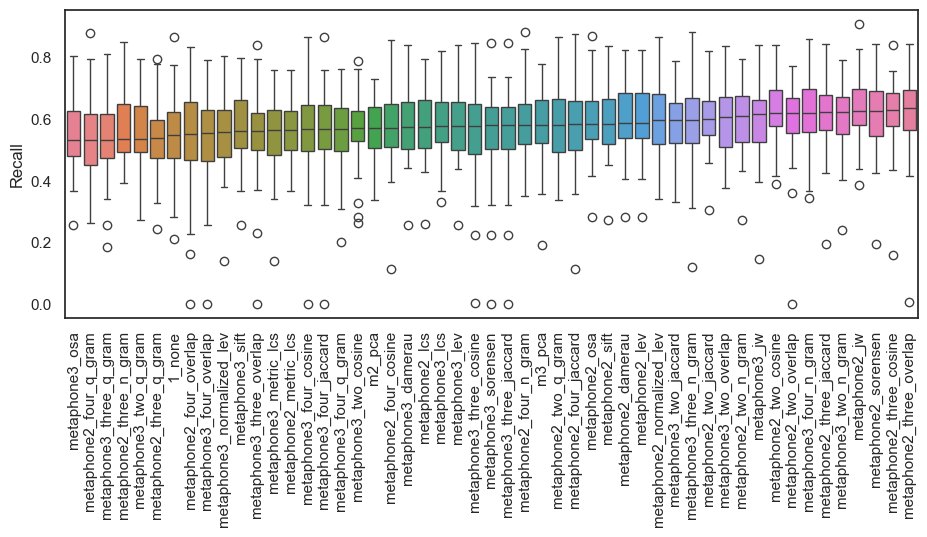

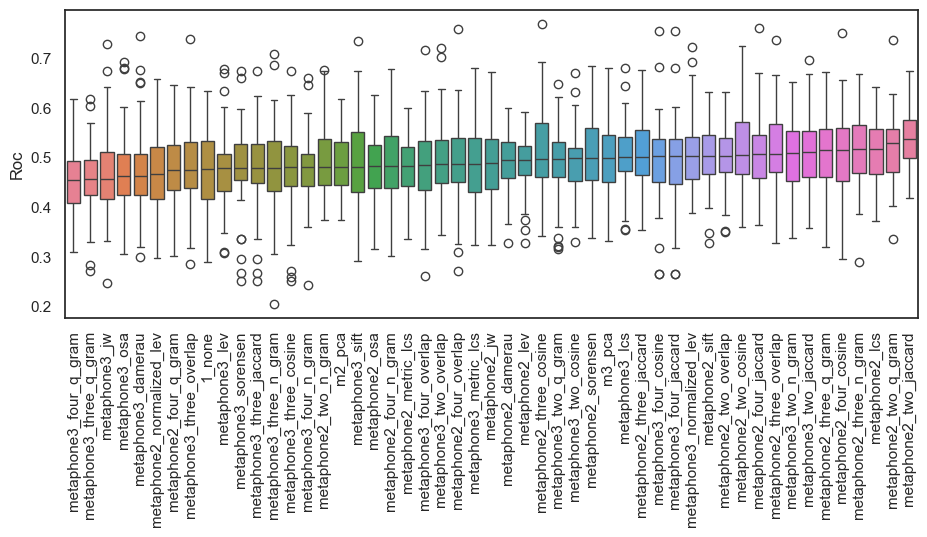

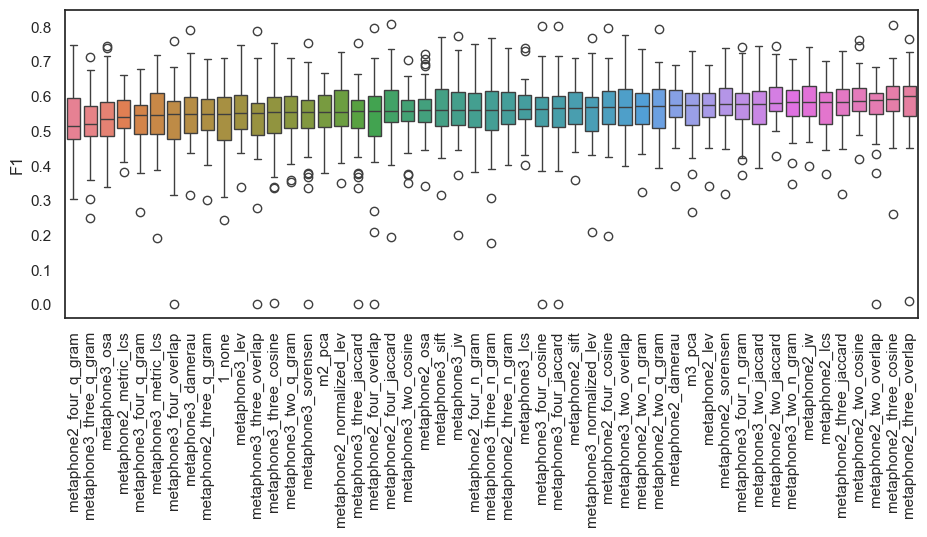

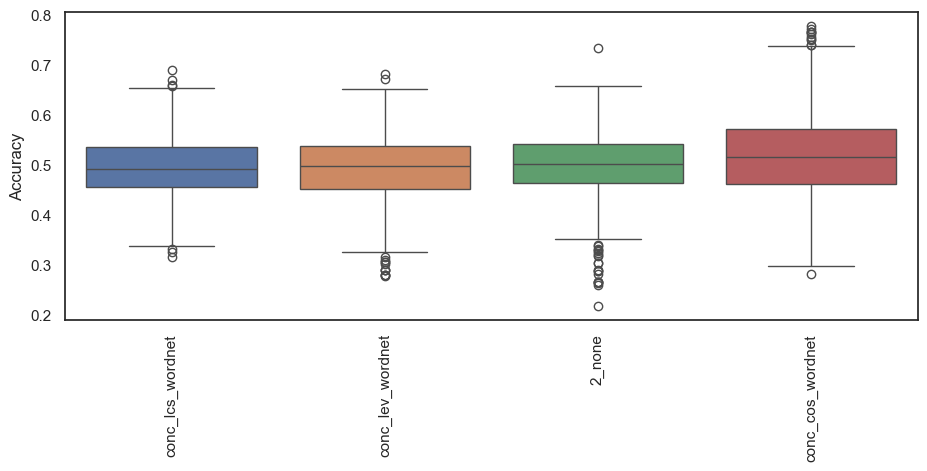

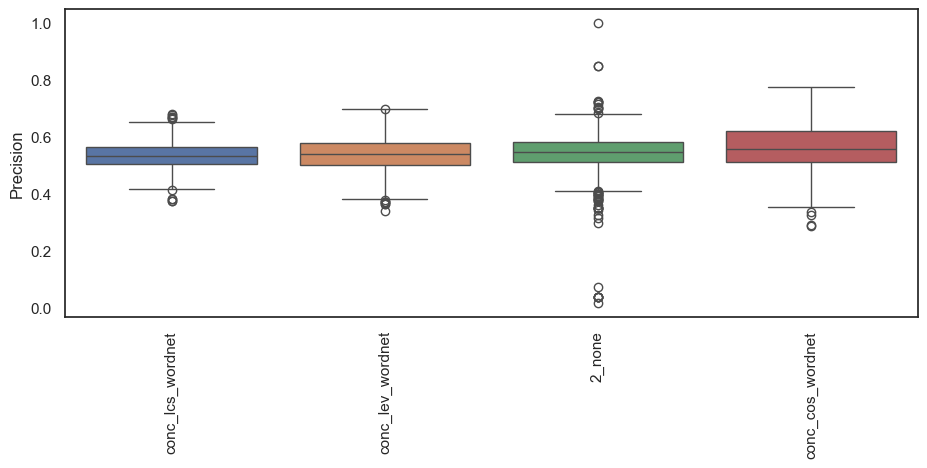

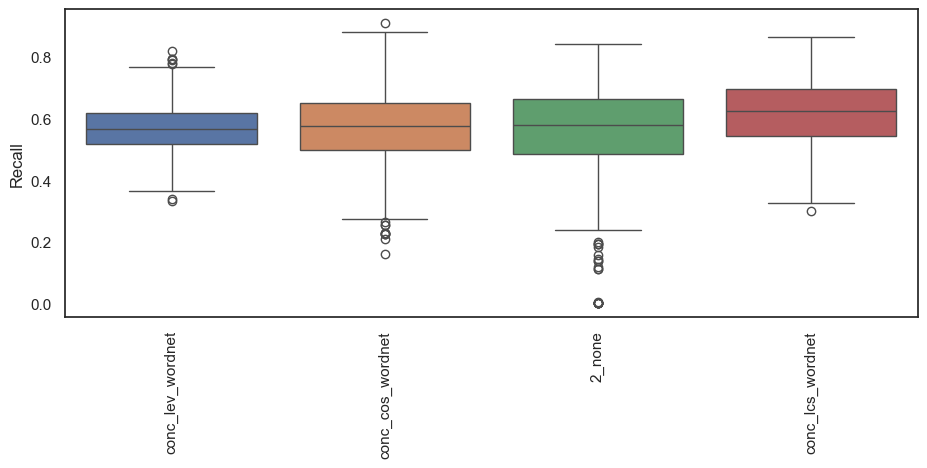

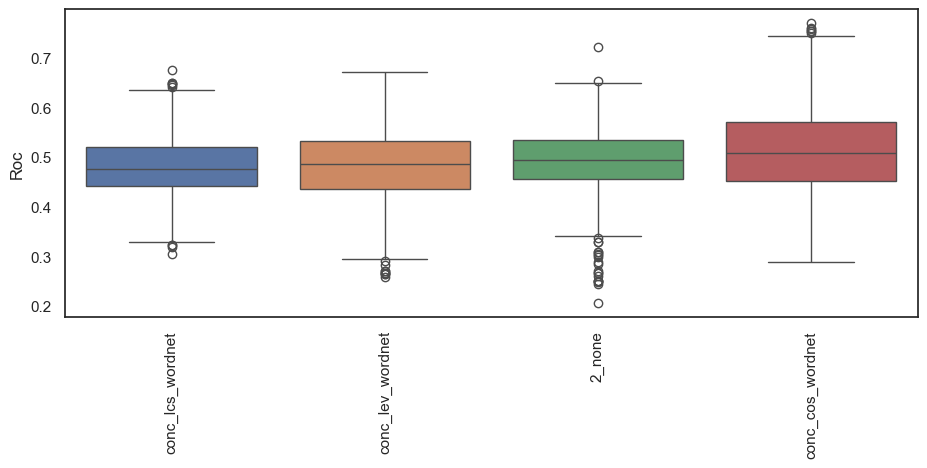

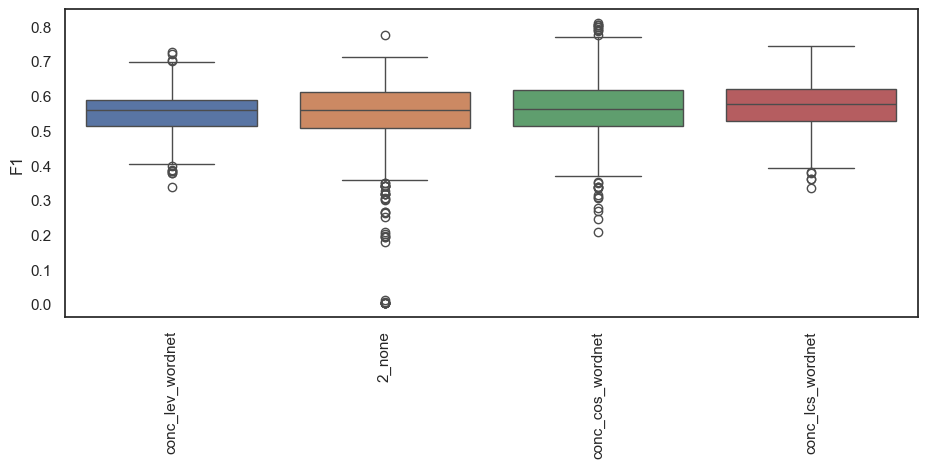

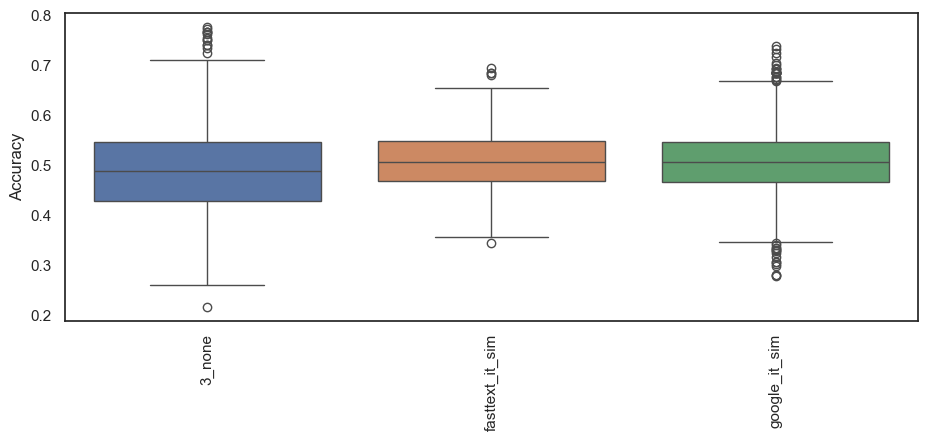

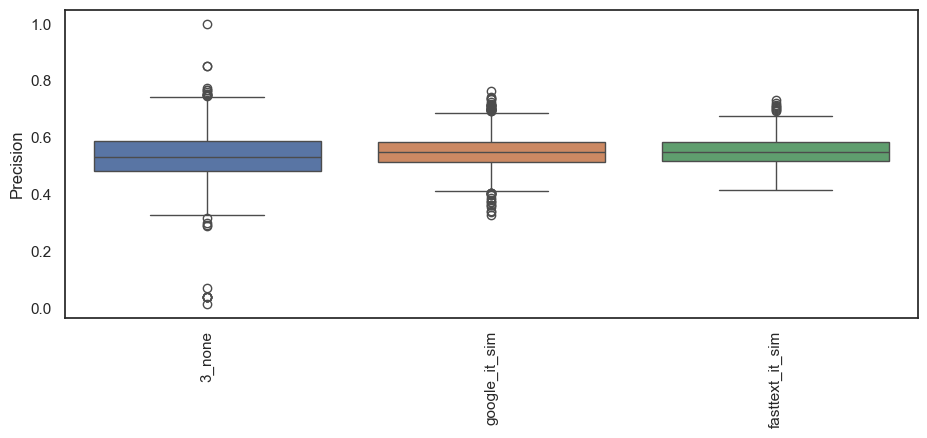

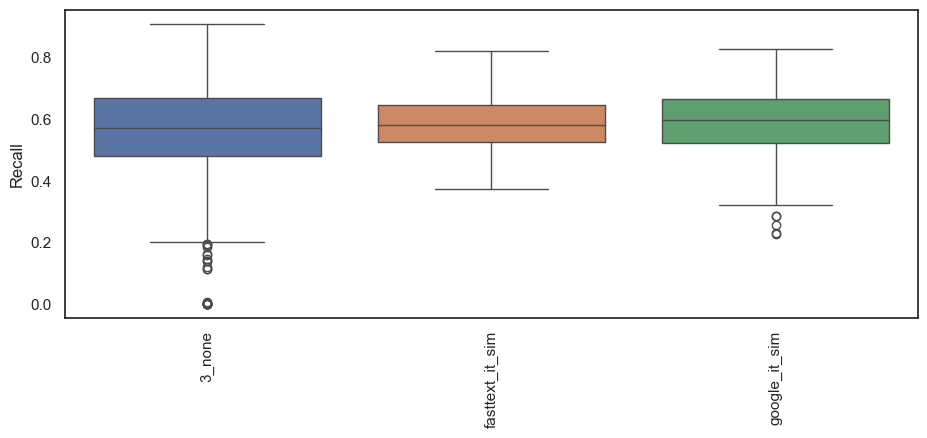

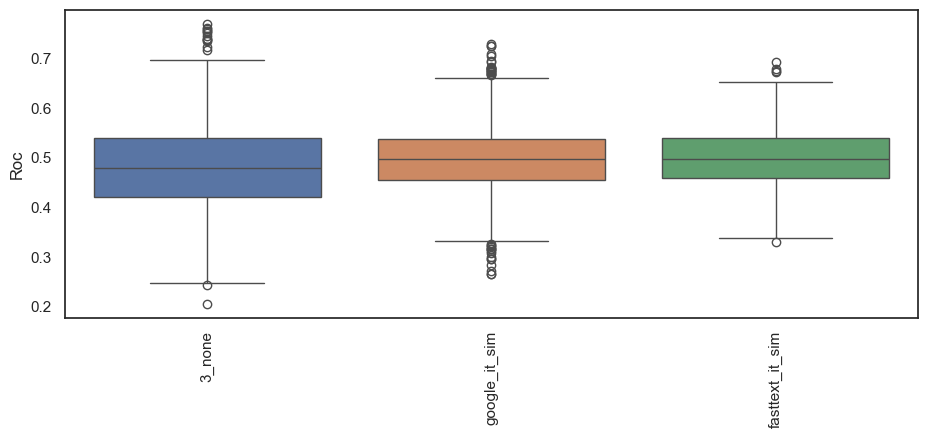

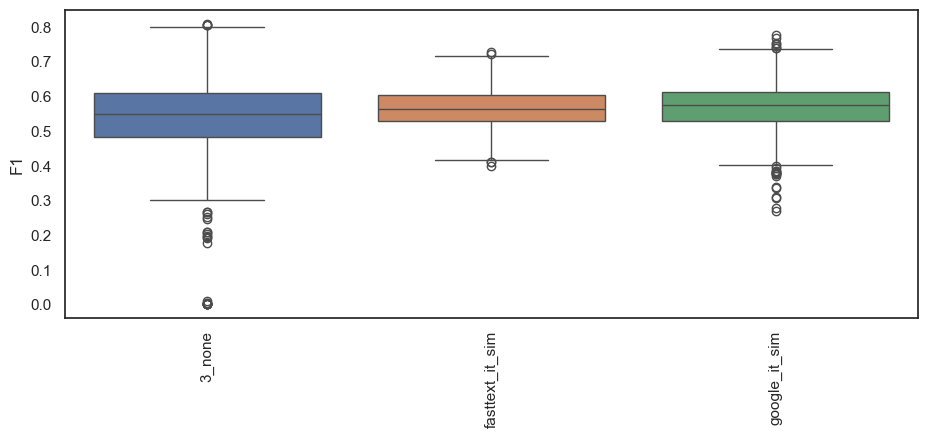

In [52]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

for model in ['svm_figurative', 'svm_word', 'rf_word', 'rf_figurative']:
    results = ''
    with open(f'tml_results_{model}_final_5-fold.txt', 'r', encoding='utf-8') as f:
        results = f.read()

    stats = {}


    m = re.finditer(r'[\d]{1,4}:\s([a-zA-Z][^\n]+)\n\n*([^@]*)', results)
    for match in m:
        features = match.group(1).split(', ')
        for i, f in enumerate(features):
            if f == 'none':
                f = f'{i}_none'
            if f not in stats:
                stats[f] = {}

        performance = match.group(2).split('\n')
        for p in performance:
            if p != '':
                d = p.split(': ')
                metric = d[0]
                score = float(d[1])

                for i, f in enumerate(features):
                    if f == 'none':
                        f = f'{i}_none'
                    if metric not in stats[f]:
                        stats[f][metric] = []

                    stats[f][metric].append(score)

    plt.rcParams['axes.grid'] = False
    import numpy as np

    #sns.heatmap(corr, cmap="Greens" ,annot=True, fmt='.4f')
    sns.set_theme(style='white')

    vis_features = [k for k in stats.keys() if not k.startswith('metaphone') and not k.startswith('conc_') and not k.startswith('1') and not k.startswith('2') and not k.startswith('3') and not k.startswith('google') and not k.startswith('fasttext') and not k.startswith('m2') and not k.startswith('m3') and not k == 'normalizer' and not k == 'standardscaler' and not k.startswith('4')]
    aur_features = [k for k in stats.keys() if k.startswith('metaphone') or k.startswith('1') or k.startswith('m2') or k.startswith('m3')]
    conc_features = [k for k in stats.keys() if k.startswith('conc_') or k.startswith('2')]
    it_features = [k for k in stats.keys() if k.startswith('google') or k.startswith('3') or k.startswith('fasttext')]
    scaler = [k for k in stats.keys() if k.startswith('4') or k == 'normalizer' or k == 'standardscaler']

    if len(scaler) > 0:
        groups = [vis_features, aur_features, conc_features, it_features, scaler]
    else:
        groups = [vis_features, aur_features, conc_features, it_features]

    for idx, group in enumerate(groups):
        group_stats = {}
        for f in group:
            new_f = f
        if f == '0_none':
            new_f = 'none'
        for m in stats[f]:
            if m not in group_stats:
                group_stats[m] = {}
            if new_f not in group_stats[m]:
                group_stats[m][new_f] = []

        for f in group:
            new_f = f
            if f == '0_none':
                new_f = 'none'
            for m in stats[f]:
                group_stats[m][new_f] = stats[f][m]
        for m in group_stats:
            group_stats[m] = dict(sorted(group_stats[m].items(), key=lambda item: np.median(item[1])))
            plt.figure(figsize=(11,4))
            h = sns.boxplot(data=group_stats[m])
            h.set_xticklabels(h.get_xticklabels(), rotation=90)
            capital_m = m.capitalize()
            h.set_ylabel(capital_m)
            h.figure.savefig(f'../features_{model}/{model}_{m}_per_{idx}_feature', bbox_inches='tight', pad_inches=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x13170f2d1b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13170f5c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13170f2cf10>],
 'medians': [<matplotlib.lines.Line2D at 0x13170f5c5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13170f5c880>],
 'means': []}

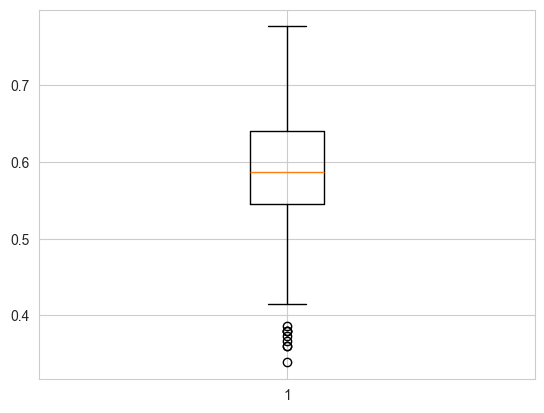

# Feature Importance for Random Forests

In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
plt.rcParams['axes.grid'] = False
with open('./tml_best_rf_word_final_5-fold.pickle', 'rb') as o:
    rrf = pickle.load(o)

[0.84121924 0.15878076]


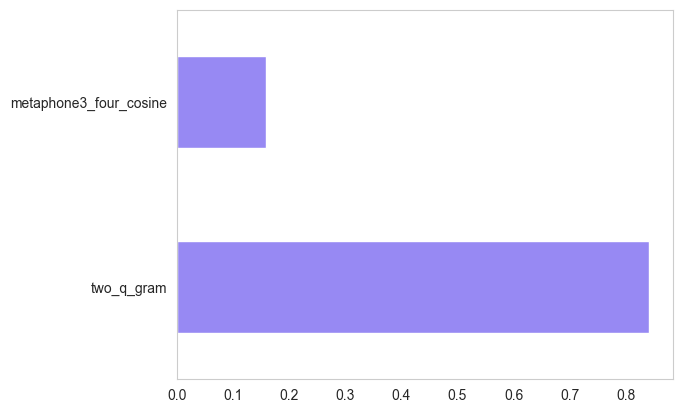

In [2]:
print(rrf.feature_importances_)

import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rrf.feature_importances_, index=['Q-Gram(n=2)', 'M3 Cosine(n=4)'])
feat_importances.nlargest(2).plot(kind='barh', color='#9789f3')
plt.savefig('./word_rf_feature_importance.png', bbox_inches='tight', pad_inches=0.3)

[0.49759608 0.15516675 0.34723717]


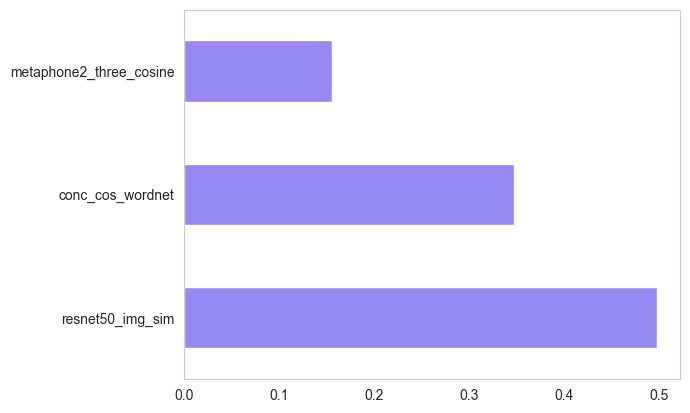

In [3]:
with open('./tml_best_rf_figurative_final_5-fold.pickle', 'rb') as o:
    rrf = pickle.load(o)
print(rrf.feature_importances_)

import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rrf.feature_importances_, index=['resnet50_img_sim', 'metaphone2_three_cosine', 'conc_cos_wordnet'])
feat_importances.nlargest(3).plot(kind='barh', color='#9789f3')
plt.savefig('./figurative_rf_feature_importance.png', bbox_inches='tight', pad_inches=0.3)

In [39]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from tml.TrademarkML import TrademarkML
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [49]:
plt.rcParams['axes.grid'] = False
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [50]:
trademark = TrademarkML()

In [51]:
features_df = pd.read_csv('../scripts/full_features_fixed.csv', sep=',', encoding='utf-8')
word_df = features_df[features_df['Type'] == 'word'].reset_index()
train_word_df, test_word_df, train_idx, test_idx = trademark.train_test_split(df=word_df, id_col='Case ID')
x_train_word, y_train_word = trademark.get_x_y_from_df(df=train_word_df, y_col='Outcome')
x_test_word, y_test_word = trademark.get_x_y_from_df(df=test_word_df, y_col='Outcome')
binarizer = LabelBinarizer()
y_train_word = binarizer.fit_transform(y_train_word).ravel()
y_test_word = binarizer.transform(y_test_word).ravel()

# Plots for SVM-WORD

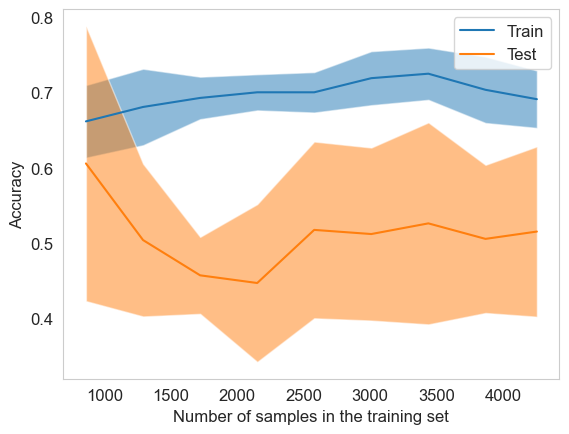

In [52]:
x_train_word_svm = x_train_word[['sorensen', 'metaphone3_lcs', 'conc_cos_wordnet']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_word, y=y_train_word, groups=word_df.loc[train_idx, 'Case ID'])
display = LearningCurveDisplay.from_estimator(LinearSVC(dual='auto', C=0.01), x_train_word_svm, y_train_word, train_sizes=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=split, random_state=42, score_name='Accuracy')
display.figure_.savefig('svm_word_learning_curve.png')

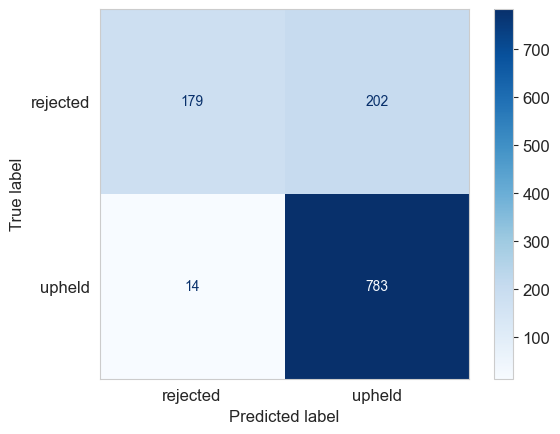

In [54]:
x_test_word_svm = x_test_word[['sorensen', 'metaphone3_lcs', 'conc_cos_wordnet']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_word_svm, y=y_train_word, groups=word_df.loc[train_idx, 'Case ID'])
gridsearch = GridSearchCV(LinearSVC(dual='auto', random_state=42), cv=split, param_grid={'C': [0.01, 0.1, 1, 10, 100]})
gridsearch.fit(x_train_word_svm, y_train_word)
y_pred_svm = gridsearch.predict(x_test_word_svm)
cm = confusion_matrix(y_test_word, y_pred_svm)
svm = gridsearch.best_estimator_
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binarizer.inverse_transform(svm.classes_))
display.plot(cmap='Blues' ,values_format='g')
display.figure_.savefig('confusion_matrix_word_svm.png')

In [19]:
pred_results = pd.DataFrame()
pred_results['Case ID'] = x_test_word['Case ID']
pred_results['Contested Item'] = x_test_word['Contested Goods and Services']
pred_results['Outcome'] = x_test_word['Outcome']
pred_results['Prediction'] = y_pred_svm
pred_results[['sorensen', 'metaphone3_lcs', 'conc_cos_wordnet']] = x_test_word[['sorensen', 'metaphone3_lcs', 'conc_cos_wordnet']]
pred_results.to_csv('./svm_word_results.csv', sep=',', encoding='utf-8', index=False)

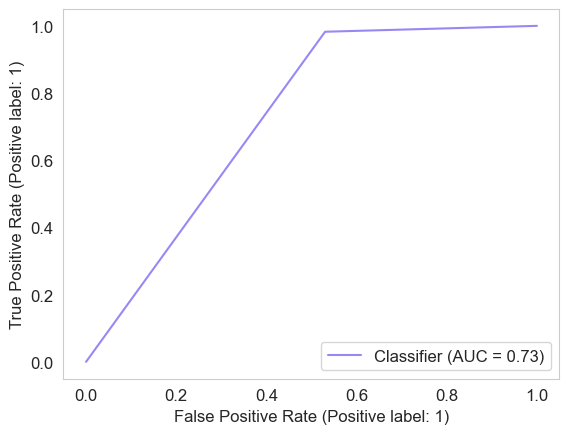

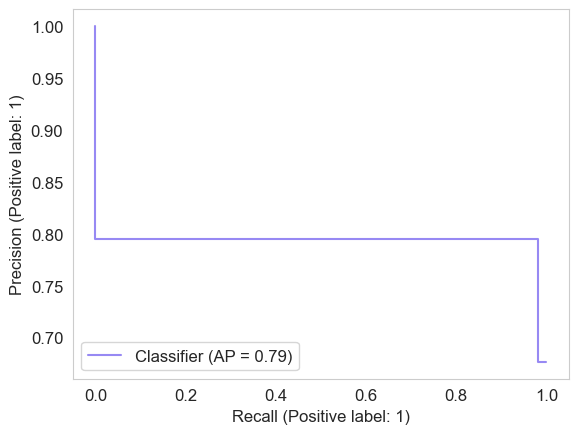

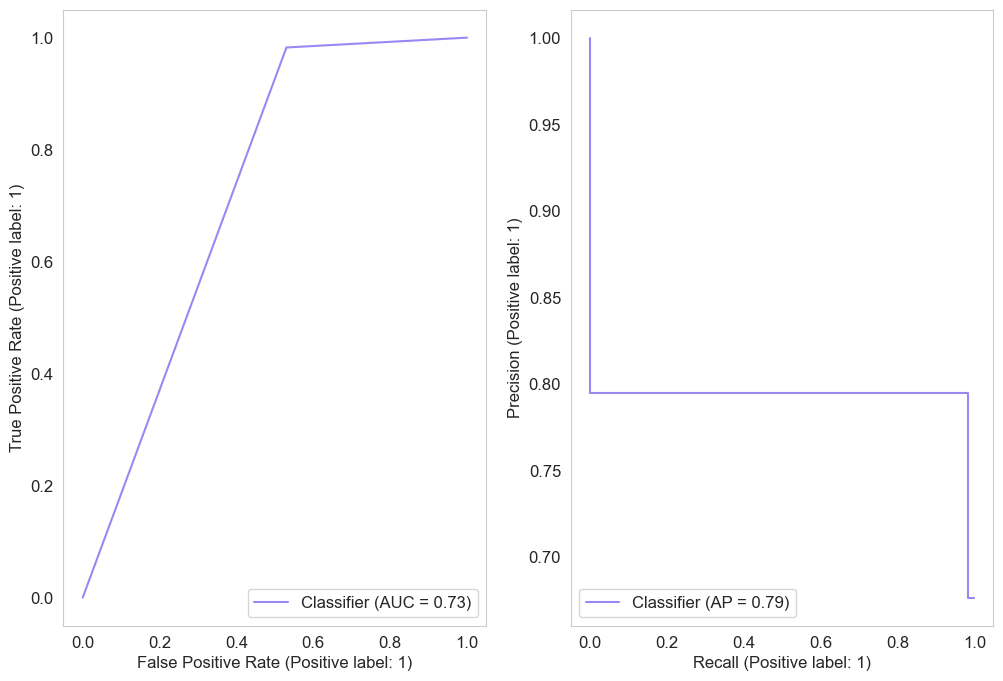

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

roc_display = RocCurveDisplay.from_predictions(y_true=y_test_word, y_pred=y_pred_svm, pos_label=1, color='#9789f3')
pr_display = PrecisionRecallDisplay.from_predictions(y_true=y_test_word, y_pred=y_pred_svm, pos_label=1, color='#9789f3')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1, color='#9789f3')
pr_display.plot(ax=ax2, color='#9789f3')
plt.savefig('rocauc_pr_svm_word.png')

In [56]:
x_train_word_svm.columns

Index(['sorensen', 'metaphone3_lcs', 'conc_cos_wordnet'], dtype='object')

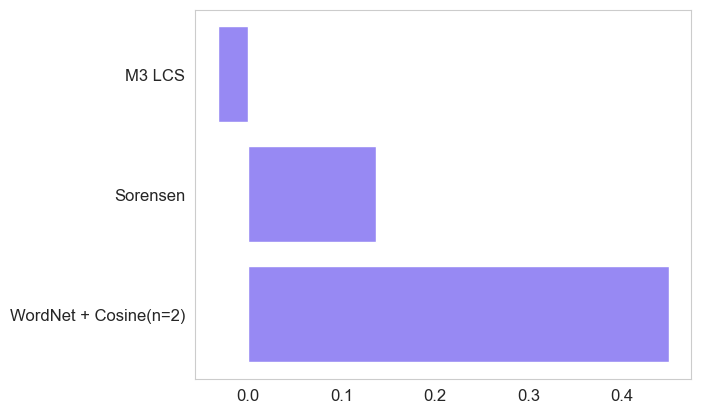

In [57]:
import numpy as np
plt.rcParams['axes.grid'] = False

zipped = zip(['Sorensen', 'M3 LCS', 'WordNet + Cosine(n=2)'], svm.coef_[0])
zipped = sorted(zipped, key = lambda t: t[1], reverse=True)
y = [t[0] for t in zipped]
width = [t[1] for t in zipped]

plt.barh(y=y, width=width, color='#9789f3')
plt.savefig('./svm_word_feature_importance.png', bbox_inches='tight', pad_inches=0.3)

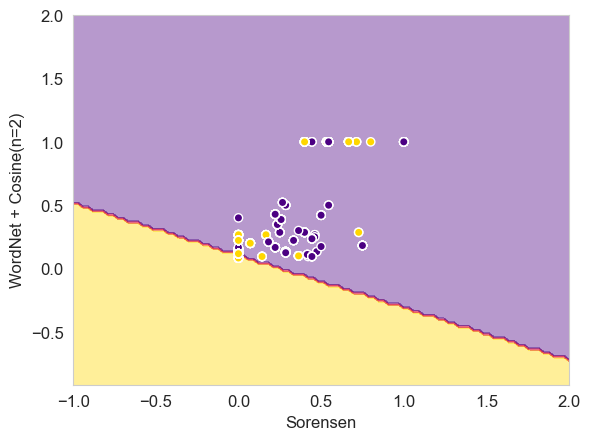

In [60]:
from sklearn.inspection import DecisionBoundaryDisplay

x_train_word_svm = x_train_word[['sorensen', 'conc_cos_wordnet']]
x_test_word_svm = x_test_word[['sorensen', 'conc_cos_wordnet']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_word_svm, y=y_train_word,
                                                                            groups=word_df.loc[train_idx, 'Case ID'])
gridsearch = GridSearchCV(LinearSVC(dual='auto', random_state=42), cv=split, param_grid={'C': [0.01, 0.1, 1, 10, 100]})
gridsearch.fit(x_train_word_svm, y_train_word)
y_pred_svm = gridsearch.predict(x_test_word_svm)
svm = gridsearch.best_estimator_

import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(["gold", "crimson", "indigo"])

disp = DecisionBoundaryDisplay.from_estimator(estimator=svm, X=x_test_word_svm, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(x_test_word_svm['sorensen'], x_test_word_svm['conc_cos_wordnet'], c=y_test_word, edgecolor='w', cmap=cmap)
disp.ax_.set_xlabel('Sorensen')
disp.ax_.set_ylabel('WordNet + Cosine(n=2)')
plt.savefig('./word_svm_vis_con_db.png', bbox_inches='tight', pad_inches=0.3)

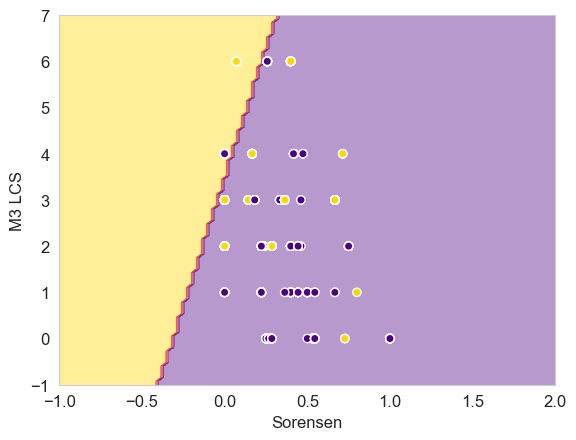

In [61]:
x_train_word_svm = x_train_word[['sorensen', 'metaphone3_lcs']]
x_test_word_svm = x_test_word[['sorensen', 'metaphone3_lcs']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_word_svm, y=y_train_word,
                                                                            groups=word_df.loc[train_idx, 'Case ID'])
gridsearch = GridSearchCV(LinearSVC(dual='auto', random_state=42), cv=split, param_grid={'C': [0.01, 0.1, 1, 10, 100]})
gridsearch.fit(x_train_word_svm, y_train_word)
y_pred_svm = gridsearch.predict(x_test_word_svm)
svm = gridsearch.best_estimator_

disp = DecisionBoundaryDisplay.from_estimator(estimator=svm, X=x_test_word_svm, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(x_test_word_svm['sorensen'], x_test_word_svm['metaphone3_lcs'], c=y_test_word,  edgecolor='w', cmap=cmap)
disp.ax_.set_xlabel('Sorensen')
disp.ax_.set_ylabel('M3 LCS')
plt.savefig('./word_svm_vis_aur_db.png', bbox_inches='tight', pad_inches=0.3)

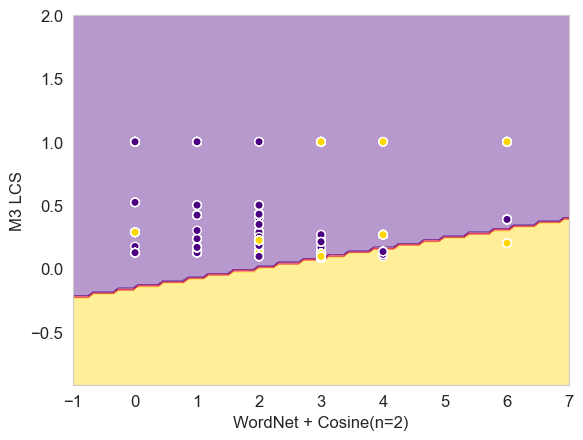

In [62]:
x_train_word_svm = x_train_word[['metaphone3_lcs', 'conc_cos_wordnet']]
x_test_word_svm = x_test_word[['metaphone3_lcs', 'conc_cos_wordnet']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_word_svm, y=y_train_word,
                                                                            groups=word_df.loc[train_idx, 'Case ID'])
gridsearch = GridSearchCV(LinearSVC(dual='auto', random_state=42), cv=split, param_grid={'C': [0.01, 0.1, 1, 10, 100]})
gridsearch.fit(x_train_word_svm, y_train_word)
y_pred_svm = gridsearch.predict(x_test_word_svm)
svm = gridsearch.best_estimator_

disp = DecisionBoundaryDisplay.from_estimator(estimator=svm, X=x_test_word_svm, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(x_test_word_svm['metaphone3_lcs'], x_test_word_svm['conc_cos_wordnet'], c=y_test_word,  edgecolor='w', cmap=cmap)
disp.ax_.set_xlabel('WordNet + Cosine(n=2)')
disp.ax_.set_ylabel('M3 LCS')
plt.savefig('./word_svm_aur_con_db.png', bbox_inches='tight', pad_inches=0.3)

# Plots for RF-WORD

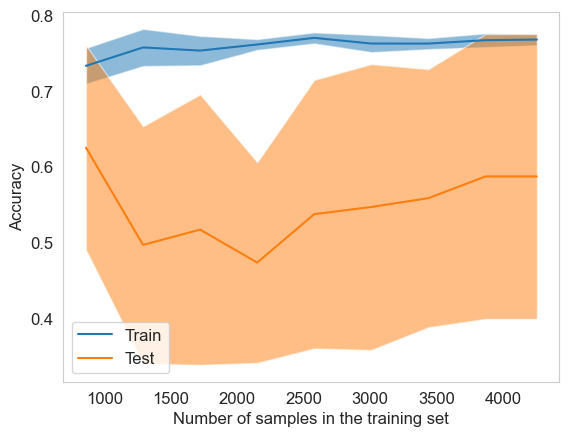

In [63]:
from sklearn.ensemble import RandomForestClassifier
x_train_word_svm = x_train_word[['two_q_gram', 'metaphone3_four_cosine']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_word, y=y_train_word, groups=word_df.loc[train_idx, 'Case ID'])
display = LearningCurveDisplay.from_estimator(RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=25, max_features='log2', n_estimators=50), x_train_word_svm, y_train_word, train_sizes=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=split, random_state=42, score_name='Accuracy')
display.figure_.savefig('rf_word_learning_curve.png')

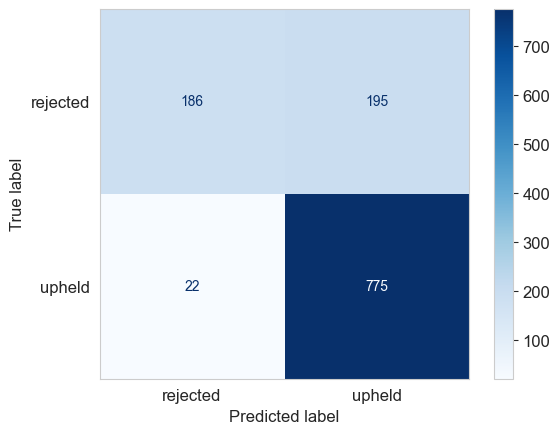

In [64]:
x_test_word_svm = x_test_word[['two_q_gram', 'metaphone3_four_cosine']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_word_svm, y=y_train_word, groups=word_df.loc[train_idx, 'Case ID'])
gridsearch = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), cv=split, param_grid={'max_depth': [25, 50, 75],
                                                                                         'max_features': ['log2', 'sqrt'],
                                                                                         'n_estimators': [15, 20, 50]})
gridsearch.fit(x_train_word_svm, y_train_word)
y_pred_rf = gridsearch.predict(x_test_word_svm)
cm = confusion_matrix(y_test_word, y_pred_rf)
rf = gridsearch.best_estimator_
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binarizer.inverse_transform(rf.classes_))
display.plot(cmap='Blues' ,values_format='g')
display.figure_.savefig('confusion_matrix_word_rf.png')

In [8]:
pred_results = pd.DataFrame()
pred_results['Case ID'] = x_test_word['Case ID']
pred_results['Contested Item'] = x_test_word['Contested Goods and Services']
pred_results['Outcome'] = x_test_word['Outcome']
pred_results['Prediction'] = y_pred_rf
pred_results[['two_q_gram', 'metaphone3_four_cosine']] = x_test_word[['two_q_gram', 'metaphone3_four_cosine']]
pred_results.to_csv('./rf_word_results.csv', sep=',', encoding='utf-8', index=False)

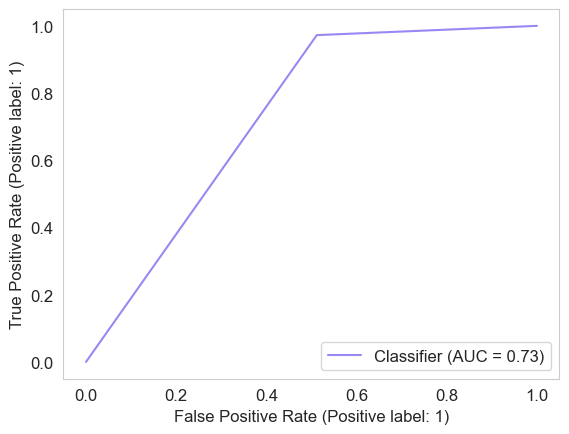

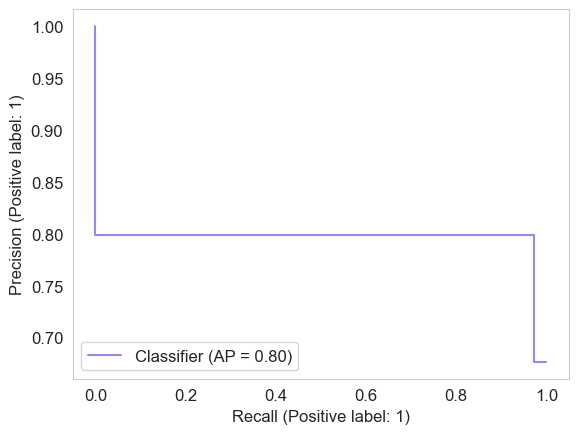

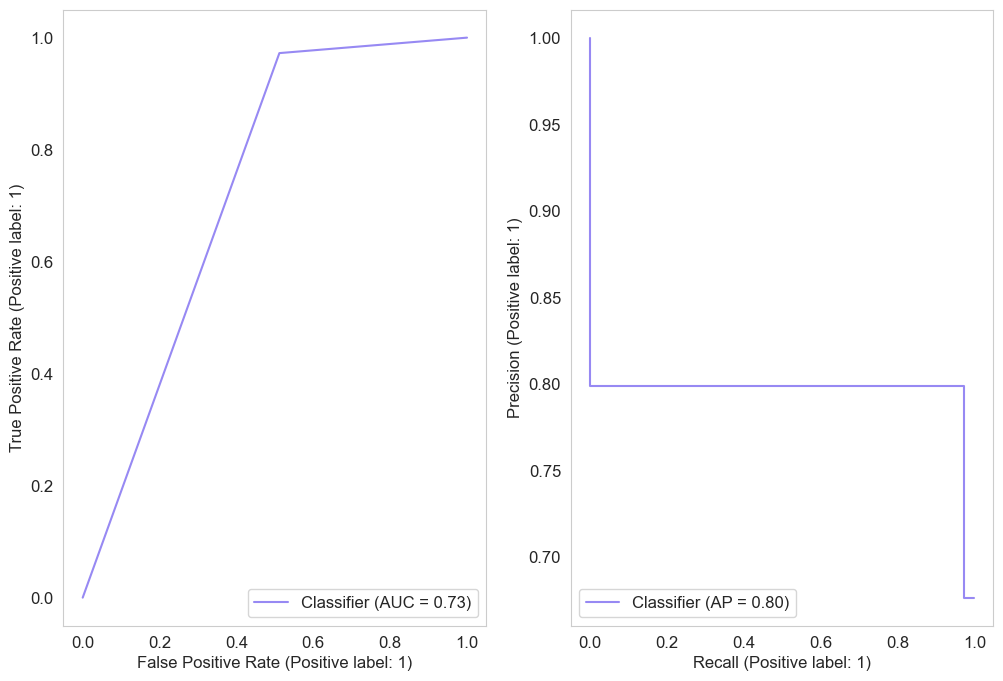

In [65]:
roc_display = RocCurveDisplay.from_predictions(y_true=y_test_word, y_pred=y_pred_rf, pos_label=1, color='#9789f3')
pr_display = PrecisionRecallDisplay.from_predictions(y_true=y_test_word, y_pred=y_pred_rf, pos_label=1, color='#9789f3')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1, color='#9789f3')
pr_display.plot(ax=ax2, color='#9789f3')
plt.savefig('rocauc_pr_rf_word.png')

C:\Users\maxha\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\maxha\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


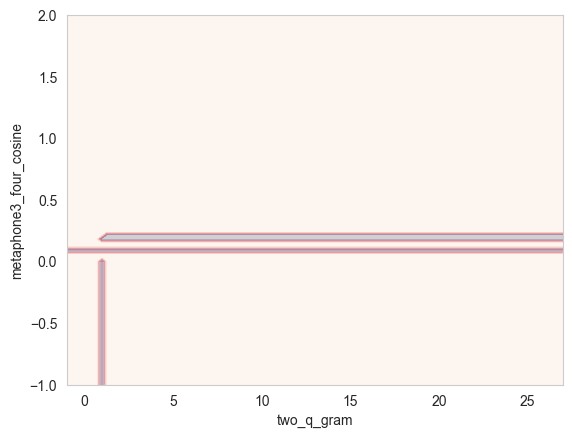

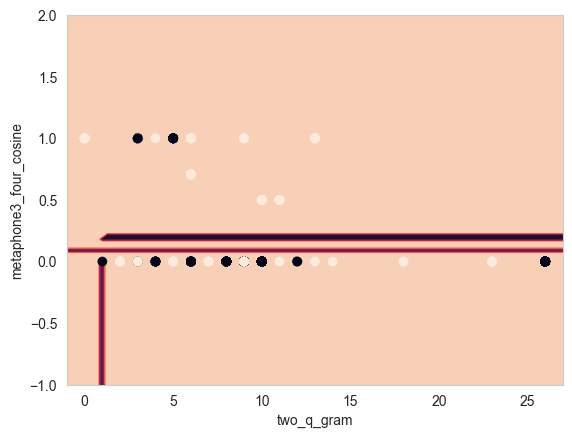

In [16]:
import numpy as np
from sklearn.preprocessing import Normalizer

model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=25, max_features='log2', n_estimators=50)
x_train_rf = x_train_word[['two_q_gram', 'metaphone3_four_cosine']]
x_test_rf = x_test_word[['two_q_gram', 'metaphone3_four_cosine']]

feature_1, feature_2 = np.meshgrid(
    np.linspace(x_train_rf['two_q_gram'].min(), x_train_rf['two_q_gram'].max()),
    np.linspace(x_train_rf['metaphone3_four_cosine'].min(), x_train_rf['metaphone3_four_cosine'].max())
)


from sklearn.inspection import DecisionBoundaryDisplay

normalizer = Normalizer()
x_train_scaled = normalizer.fit_transform(x_train_rf)
x_test_scaled = normalizer.transform(x_test_rf)

model.fit(x_train_scaled, y_train_word)
y_pred_word_rf = rf.predict(x_test_scaled)

display = DecisionBoundaryDisplay.from_estimator(estimator=model, X=x_test_rf, alpha=0.2, response_method='predict')
display.plot()
display.ax_.scatter(
    x=x_test_rf['two_q_gram'], y=x_test_rf['metaphone3_four_cosine'], c=y_test_word
)
display.figure_.savefig('decision_boundary_rf_word_train.png')

## Comparison of RF and SVM

In [54]:
len(y_test_word)

1178

In [41]:
differences = x_test_word[['Case ID', 'Earlier Trademark', 'Contested Trademark', 'Earlier Goods and Services', 'Contested Goods and Services', 'two_q_gram', 'metaphone3_four_cosine', 'sorensen', 'metaphone3_lcs', 'conc_cos_wordnet', 'fasttext_it_sim', 'Outcome']]
differences['rf_pred'] = y_pred_rf
differences['svm_pred'] = y_pred_svm
differences = differences[y_pred_rf != y_pred_svm]

C:\Users\maxha\AppData\Local\Temp\ipykernel_3664\1364111106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences['rf_pred'] = y_pred_rf
C:\Users\maxha\AppData\Local\Temp\ipykernel_3664\1364111106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences['svm_pred'] = y_pred_svm


In [31]:
differences.head(5)

Case ID Contested Trademark Earlier Trademark  \
1705  003175123       Freeze Dragon            FREEZE   
2635  003165000            UnityOCT          UNITREVO   
2636  003165000            UnityOCT          UNITREVO   
2637  003165000            UnityOCT          UNITREVO   
2638  003165000            UnityOCT          UNITREVO   

                           Contested Goods and Services  \
1705  Personal vaporisers and electronic cigarettes,...   
2635                  medical apparatus and instruments   
2636                             ophthalmic instruments   
2637                        lasers for medical purposes   
2638             endoscopy cameras for medical purposes   

                             Earlier Goods and Services  damerau  four_cosine  \
1705  Personal vaporisers and electronic cigarettes,...      8.0     0.365148   
2635                              drug delivery devices      5.0     0.000000   
2636                              drug delivery devices      5.0     0.000000   
2637                              drug delivery devices      5.0     0.000000   
2638                              drug delivery devices      5.0     0.000000   

      four_jaccard  four_n_gram  four_overlap  ...  metaphone3_two_q_gram  \
1705      0.181818     0.698718      0.666667  ...                    2.0   
2635      0.000000     0.572917      0.000000  ...                    4.0   
2636      0.000000     0.572917      0.000000  ...                    4.0   
2637      0.000000     0.572917      0.000000  ...                    4.0   
2638      0.000000     0.572917      0.000000  ...                    4.0   

      conc_lev_wordnet  conc_cos_wordnet  conc_lcs_wordnet  vgg16_img_sim  \
1705          0.235294          1.000000          0.166667            NaN   
2635          0.222222          0.266667          0.266667            NaN   
2636          0.222222          0.266667          0.266667            NaN   
2637          0.222222          0.266667          0.266667            NaN   
2638          0.222222          0.266667          0.266667            NaN   

      vgg19_img_sim  resnet50_img_sim  google_it_sim   Outcome  \
1705            NaN               NaN       1.000000    upheld   
2635            NaN               NaN       0.365004  rejected   
2636            NaN               NaN       0.359976  rejected   
2637            NaN               NaN       0.293020  rejected   
2638            NaN               NaN       0.236947  rejected   

      fasttext_it_sim  
1705         1.000000  
2635         0.547937  
2636         0.485805  
2637         0.562572  
2638         0.594931  

[5 rows x 86 columns]

In [42]:
differences.to_csv('./word_differences.csv', sep=',', encoding='utf-8', index=False)

In [51]:
all_samples = x_test_word[['Case ID', 'Earlier Trademark', 'Contested Trademark', 'Earlier Goods and Services', 'Contested Goods and Services', 'sorensen', 'metaphone3_lcs', 'conc_cos_wordnet', 'fasttext_it_sim', 'Outcome']]
all_samples['svm_pred'] = y_pred_svm

outcome_dict = {}

for i, row in all_samples.iterrows():
    id = row['Case ID']
    if id not in outcome_dict:
        outcome_dict[id] = {}
    if row['svm_pred'] == 1:
        outcome_dict[id]['1'] = True
    else:
        outcome_dict[id]['0'] = True


C:\Users\maxha\AppData\Local\Temp\ipykernel_3664\923668524.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
outcome_dict

{'003159802': {'1': True},
 '003166569': {'1': True},
 '003168133': {'1': True},
 '003177745': {'1': True},
 '003180292': {'0': True},
 '003156209': {'1': True},
 '003175439': {'1': True},
 '003166969': {'1': True},
 '003165800': {'1': True},
 '003173672': {'1': True},
 '003109230': {'1': True},
 '003174813': {'1': True},
 '003172662': {'1': True},
 '003121903': {'1': True},
 '003175004': {'1': True},
 '003175123': {'1': True},
 '003170812': {'1': True},
 '003135196': {'1': True},
 '003171453': {'1': True},
 '003165000': {'1': True},
 '003172915': {'1': True},
 '003170642': {'1': True},
 '003149243': {'1': True},
 '003170523': {'1': True},
 '003177425': {'1': True},
 '003164834': {'1': True},
 '003173934': {'1': True},
 '003167145': {'1': True},
 '003145958': {'1': True},
 '003167974': {'1': True},
 '003151254': {'1': True},
 '003097006': {'0': True},
 '003172959': {'1': True},
 '003159404': {'1': True},
 '003108930': {'1': True},
 '003167559': {'0': True},
 '003112945': {'1': True},
 

# Figurative-SVM

In [66]:
features_df = pd.read_csv('../scripts/full_features_fixed.csv', sep=',', encoding='utf-8')
fig_df = features_df[features_df['Type'] == 'figurative'].reset_index()
train_fig_df, test_fig_df, train_idx, test_idx = trademark.train_test_split(df=fig_df, id_col='Case ID')
x_train_fig, y_train_fig = trademark.get_x_y_from_df(df=train_fig_df, y_col='Outcome')
x_test_fig, y_test_fig = trademark.get_x_y_from_df(df=test_fig_df, y_col='Outcome')
binarizer = LabelBinarizer()
y_train_fig = binarizer.fit_transform(y_train_fig).ravel()
y_test_fig = binarizer.transform(y_test_fig).ravel()

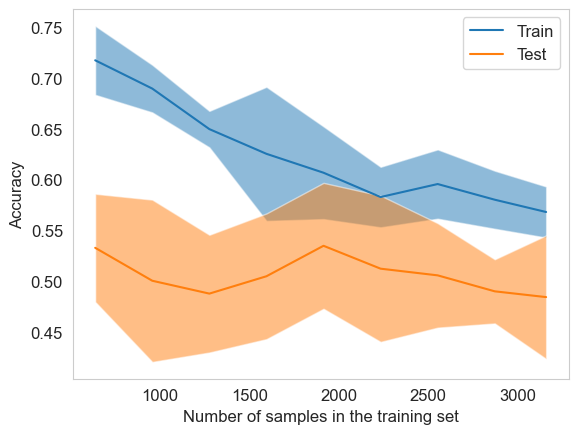

In [67]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])

x_train_fig_svm = x_train_fig[['vgg19_img_sim', 'metaphone3_two_cosine', 'conc_lev_wordnet', 'google_it_sim']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_fig_svm, y=y_train_fig, groups=fig_df.loc[train_idx, 'Case ID'])
display = LearningCurveDisplay.from_estimator(pipeline, x_train_fig_svm, y_train_fig, train_sizes=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=split, score_name='Accuracy', random_state=42)
display.figure_.savefig('svm_fig_learning_curve.png')

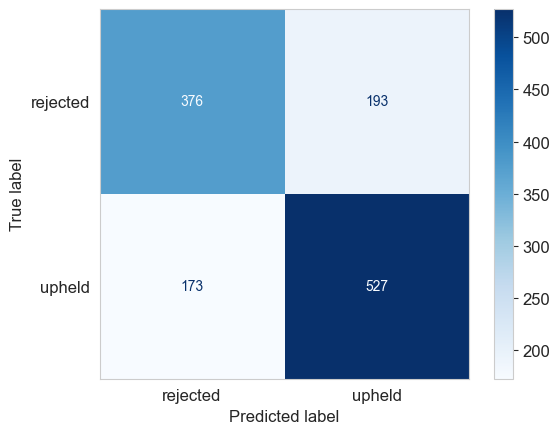

In [68]:
pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto'))])

params = {
    'SVM__C':  [0.01, 0.1, 1, 10, 100]
}

x_test_fig_svm = x_test_fig[['vgg19_img_sim', 'metaphone3_two_cosine', 'conc_lev_wordnet', 'google_it_sim']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_fig_svm, y=y_train_fig, groups=fig_df.loc[train_idx, 'Case ID'])
gridsearch = GridSearchCV(pipeline, cv=split, param_grid=params)
gridsearch.fit(x_train_fig_svm, y_train_fig)
y_pred_fig = gridsearch.predict(x_test_fig_svm)
cm = confusion_matrix(y_test_fig, y_pred_fig)
svm = gridsearch.best_estimator_
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binarizer.inverse_transform(svm.classes_))
display.plot(cmap='Blues' ,values_format='g')
display.figure_.savefig('confusion_matrix_fig_svm.png')

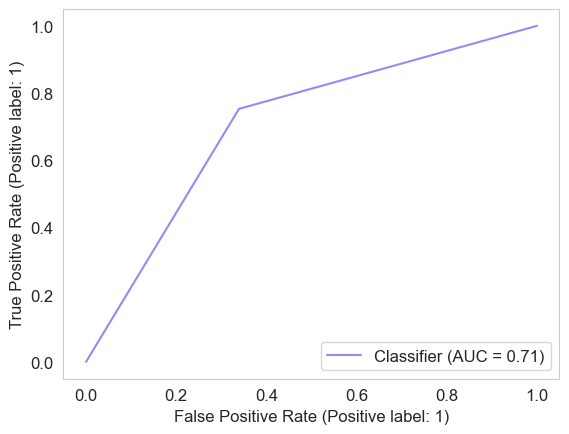

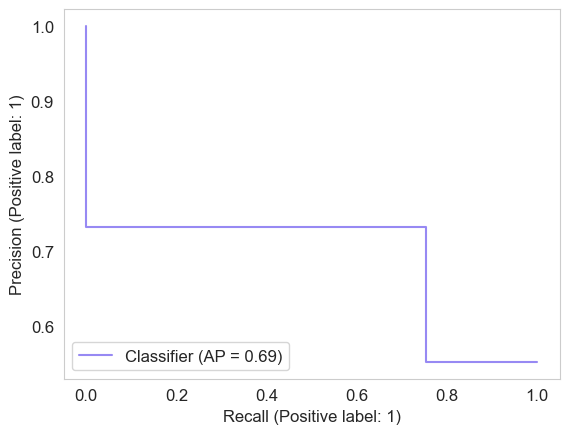

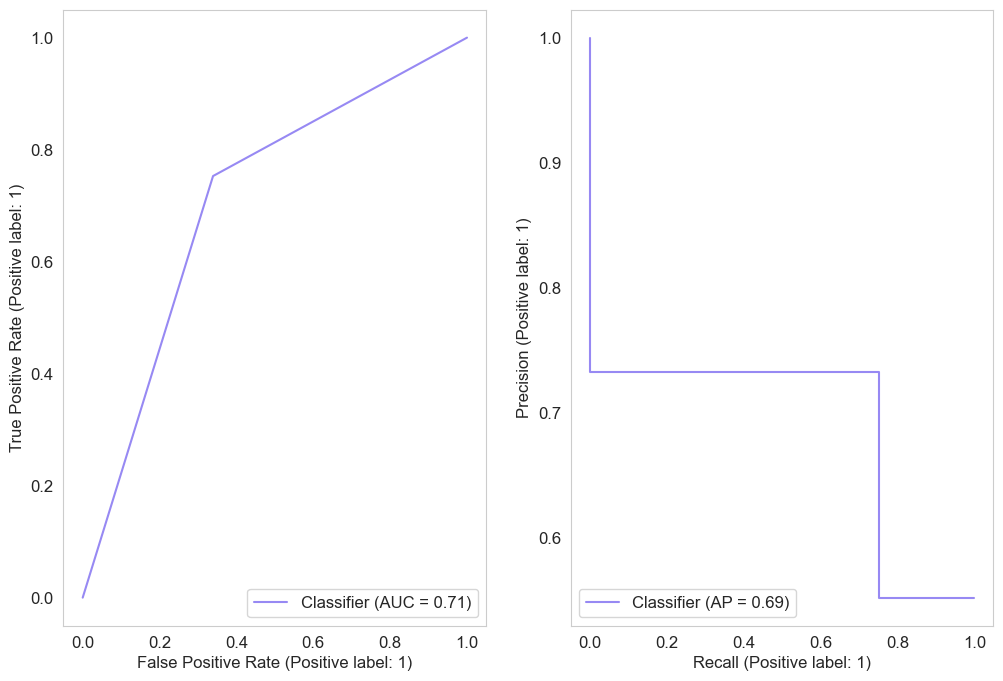

In [69]:
roc_display = RocCurveDisplay.from_predictions(y_true=y_test_fig, y_pred=y_pred_fig, pos_label=1, color='#9789f3')
pr_display = PrecisionRecallDisplay.from_predictions(y_true=y_test_fig, y_pred=y_pred_fig, pos_label=1, color='#9789f3')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1, color='#9789f3')
pr_display.plot(ax=ax2, color='#9789f3')
plt.savefig('rocauc_pr_svm_fig.png')

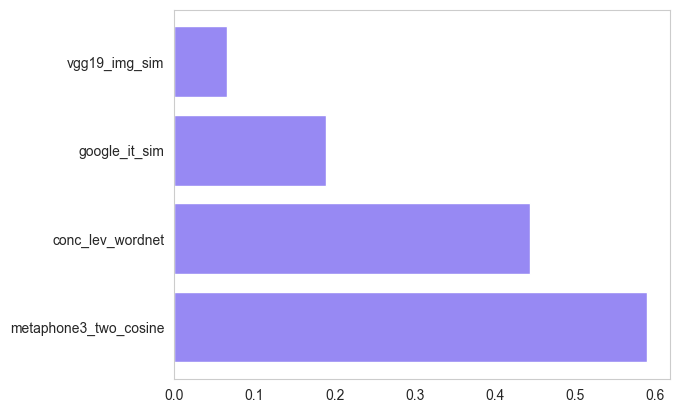

In [23]:
zipped = zip(x_train_fig_svm.columns, svm.named_steps['SVM'].coef_[0])
zipped = sorted(zipped, key = lambda t: t[1], reverse=True)
y = [t[0] for t in zipped]
width = [t[1] for t in zipped]

plt.barh(y=y, width=width, color='#9789f3')
plt.savefig('./svm_fig_feature_importance.png', bbox_inches='tight', pad_inches=0.3)

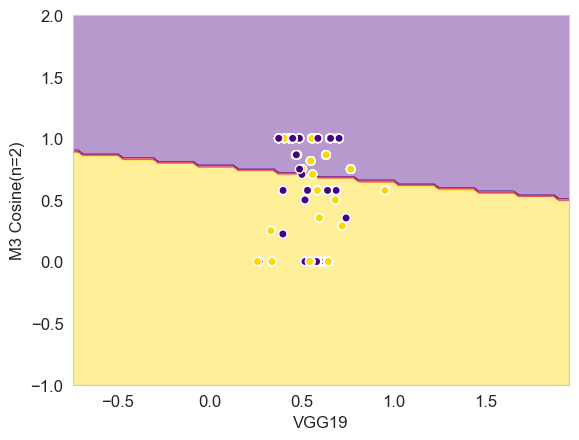

In [75]:
from sklearn.inspection import DecisionBoundaryDisplay
#x_train_fig_svm = x_train_fig[['vgg19_img_sim', 'metaphone3_two_cosine', 'conc_lev_wordnet', 'google_it_sim']]

import matplotlib.colors

cmap = matplotlib.colors.ListedColormap(["gold", "crimson", "indigo"])

f_subset_train = x_train_fig[['vgg19_img_sim', 'metaphone3_two_cosine']]
f_subset_test = x_test_fig[['vgg19_img_sim', 'metaphone3_two_cosine']]

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])
pipeline = LinearSVC(dual='auto', C=0.1)
pipeline.fit(f_subset_train, y_train_fig)
y_pred_svm = pipeline.predict(f_subset_test)

disp = DecisionBoundaryDisplay.from_estimator(estimator=pipeline, X=f_subset_test, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(f_subset_test['vgg19_img_sim'], f_subset_test['metaphone3_two_cosine'], c=y_test_fig, edgecolor='w',
                 cmap=cmap)
disp.ax_.set_xlabel('VGG19')
disp.ax_.set_ylabel('M3 Cosine(n=2)')
plt.savefig('./fig_svm_vis_aur_db.png', bbox_inches='tight', pad_inches=0.3)

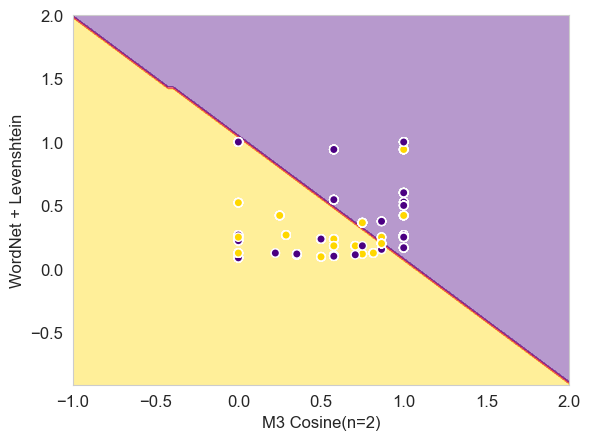

In [76]:
f_subset_train = x_train_fig[['metaphone3_two_cosine', 'conc_lev_wordnet']]
f_subset_test = x_test_fig[['metaphone3_two_cosine', 'conc_lev_wordnet']]

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])
pipeline = LinearSVC(dual='auto', C=0.1)
pipeline.fit(f_subset_train, y_train_fig)
y_pred_svm = pipeline.predict(f_subset_test)

disp = DecisionBoundaryDisplay.from_estimator(estimator=pipeline, X=f_subset_test, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(f_subset_test['metaphone3_two_cosine'], f_subset_test['conc_lev_wordnet'], c=y_test_fig, edgecolor='w',
                 cmap=cmap)
disp.ax_.set_xlabel('M3 Cosine(n=2)')
disp.ax_.set_ylabel('WordNet + Levenshtein')
plt.savefig('./fig_svm_aur_con_db.png', bbox_inches='tight', pad_inches=0.3)

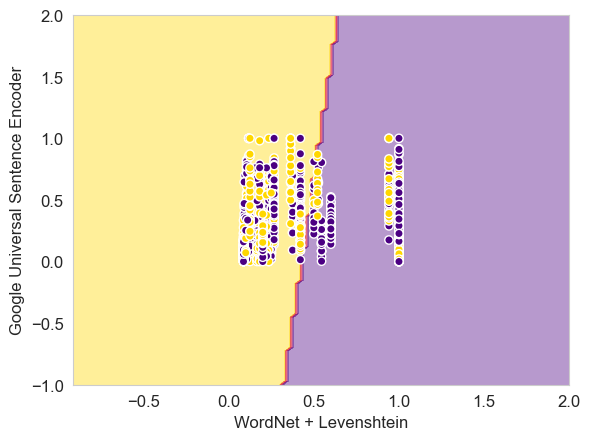

In [80]:
f_subset_train = x_train_fig[['conc_lev_wordnet', 'google_it_sim']]
f_subset_test = x_test_fig[['conc_lev_wordnet', 'google_it_sim']]

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])
pipeline = LinearSVC(dual='auto', C=0.1)
pipeline.fit(f_subset_train, y_train_fig)
y_pred_svm = pipeline.predict(f_subset_test)

disp = DecisionBoundaryDisplay.from_estimator(estimator=pipeline, X=f_subset_test, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(f_subset_test['conc_lev_wordnet'], f_subset_test['google_it_sim'], c=y_test_fig, edgecolor='w',
                 cmap=cmap)
disp.ax_.set_xlabel('WordNet + Levenshtein')
disp.ax_.set_ylabel('Google Universal Sentence Encoder')
plt.savefig('./fig_svm_con_it_db.png', bbox_inches='tight', pad_inches=0.3)

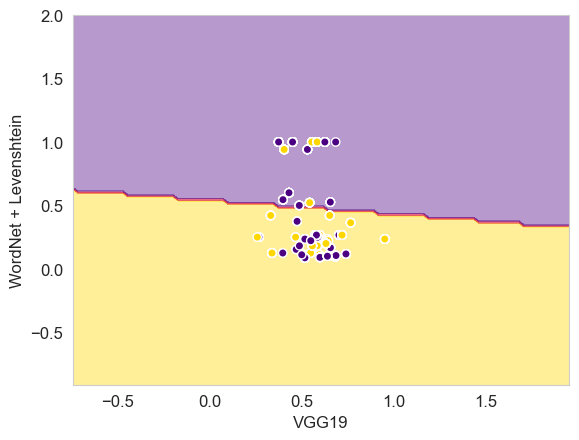

In [78]:
f_subset_train = x_train_fig[['vgg19_img_sim', 'conc_lev_wordnet']]
f_subset_test = x_test_fig[['vgg19_img_sim', 'conc_lev_wordnet']]

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])
pipeline = LinearSVC(dual='auto', C=0.1)
pipeline.fit(f_subset_train, y_train_fig)
y_pred_svm = pipeline.predict(f_subset_test)

disp = DecisionBoundaryDisplay.from_estimator(estimator=pipeline, X=f_subset_test, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(f_subset_test['vgg19_img_sim'], f_subset_test['conc_lev_wordnet'], c=y_test_fig, edgecolor='w',
                 cmap=cmap)
disp.ax_.set_xlabel('VGG19')
disp.ax_.set_ylabel('WordNet + Levenshtein')
plt.savefig('./fig_svm_vis_con_db.png', bbox_inches='tight', pad_inches=0.3)

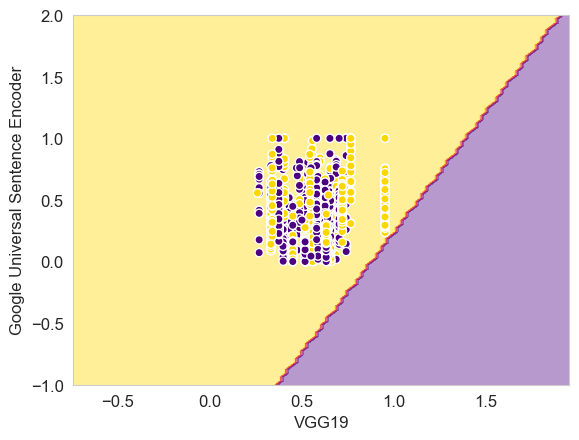

In [81]:
f_subset_train = x_train_fig[['vgg19_img_sim', 'google_it_sim']]
f_subset_test = x_test_fig[['vgg19_img_sim', 'google_it_sim']]

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])
pipeline = LinearSVC(dual='auto', C=0.1)
pipeline.fit(f_subset_train, y_train_fig)
y_pred_svm = pipeline.predict(f_subset_test)

disp = DecisionBoundaryDisplay.from_estimator(estimator=pipeline, X=f_subset_test, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(f_subset_test['vgg19_img_sim'], f_subset_test['google_it_sim'], c=y_test_fig, edgecolor='w',
                 cmap=cmap)
disp.ax_.set_xlabel('VGG19')
disp.ax_.set_ylabel('Google Universal Sentence Encoder')
plt.savefig('./fig_svm_vis_it_db.png', bbox_inches='tight', pad_inches=0.3)

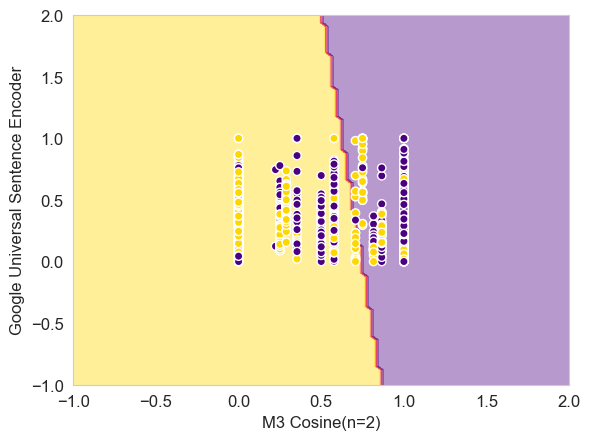

In [82]:
f_subset_train = x_train_fig[['metaphone3_two_cosine', 'google_it_sim']]
f_subset_test = x_test_fig[['metaphone3_two_cosine', 'google_it_sim']]

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])
pipeline = LinearSVC(dual='auto', C=0.1)
pipeline.fit(f_subset_train, y_train_fig)
y_pred_svm = pipeline.predict(f_subset_test)

disp = DecisionBoundaryDisplay.from_estimator(estimator=pipeline, X=f_subset_test, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(f_subset_test['metaphone3_two_cosine'], f_subset_test['google_it_sim'], c=y_test_fig, edgecolor='w',
                 cmap=cmap)
disp.ax_.set_xlabel('M3 Cosine(n=2)')
disp.ax_.set_ylabel('Google Universal Sentence Encoder')
plt.savefig('./fig_svm_aur_it_db.png', bbox_inches='tight', pad_inches=0.3)

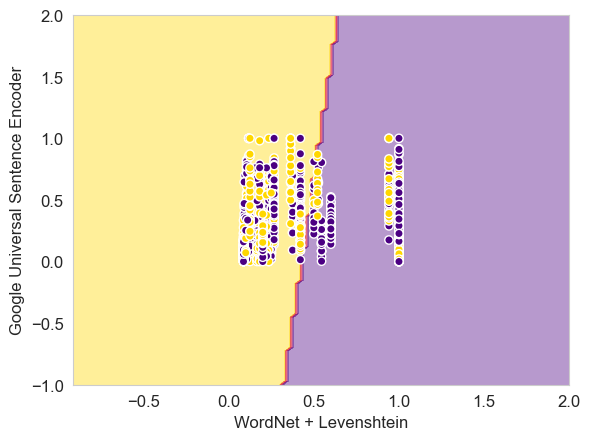

In [83]:
f_subset_train = x_train_fig[['conc_lev_wordnet', 'google_it_sim']]
f_subset_test = x_test_fig[['conc_lev_wordnet', 'google_it_sim']]

pipeline = Pipeline([('scaler',  Normalizer()),
                     ('SVM', LinearSVC(dual='auto', C=0.1))])
pipeline = LinearSVC(dual='auto', C=0.1)
pipeline.fit(f_subset_train, y_train_fig)
y_pred_svm = pipeline.predict(f_subset_test)

disp = DecisionBoundaryDisplay.from_estimator(estimator=pipeline, X=f_subset_test, response_method='predict', cmap=cmap, alpha=0.4)
disp.ax_.scatter(f_subset_test['conc_lev_wordnet'], f_subset_test['google_it_sim'], c=y_test_fig, edgecolor='w',
                 cmap=cmap)
disp.ax_.set_xlabel('WordNet + Levenshtein')
disp.ax_.set_ylabel('Google Universal Sentence Encoder')
plt.savefig('./fig_svm_con_it_db.png', bbox_inches='tight', pad_inches=0.3)

# RF-Figurative

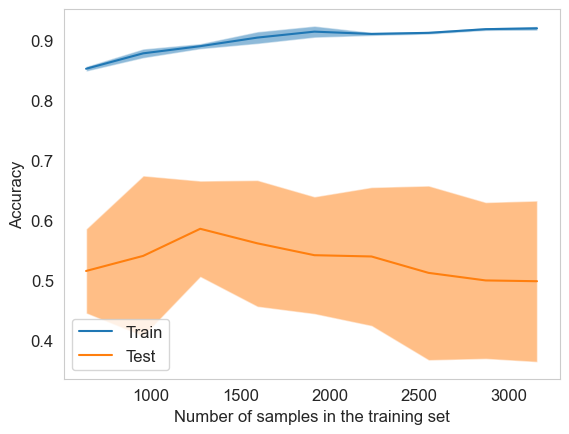

In [87]:
x_train_fig_rf = x_train_fig[['resnet50_img_sim', 'metaphone2_three_cosine', 'conc_cos_wordnet']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_fig_rf, y=y_train_fig, groups=fig_df.loc[train_idx, 'Case ID'])
display = LearningCurveDisplay.from_estimator(RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=25, max_features='log2', n_estimators=50), x_train_fig_rf, y_train_fig, train_sizes=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=split, score_name='Accuracy', random_state=42) #{'max_depth': 25, 'max_features': 'log2', 'n_estimators': 50}
display.figure_.savefig('rf_fig_learning_curve.png')

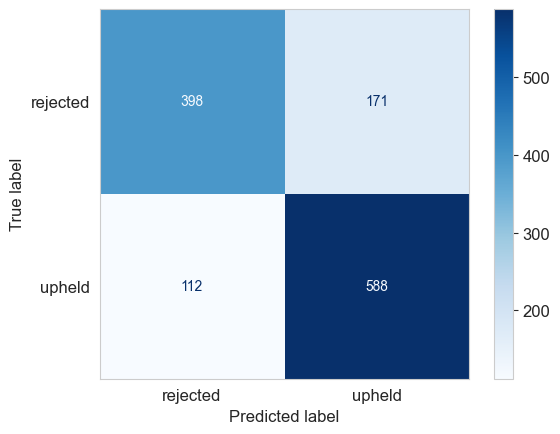

In [88]:
params = {'max_depth': [25, 50, 75],
          'max_features': ['log2', 'sqrt'],
          'n_estimators': [15, 20, 50]}

x_test_fig_rf = x_test_fig[['resnet50_img_sim', 'metaphone2_three_cosine', 'conc_cos_wordnet']]
split = GroupShuffleSplit(n_splits=5, train_size=.8, random_state=42).split(X=x_train_fig_rf, y=y_train_fig, groups=fig_df.loc[train_idx, 'Case ID'])
gridsearch = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), cv=split, param_grid=params)
gridsearch.fit(x_train_fig_rf, y_train_fig)
y_pred_fig = gridsearch.predict(x_test_fig_rf)
cm = confusion_matrix(y_test_fig, y_pred_fig)
svm = gridsearch.best_estimator_
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binarizer.inverse_transform(rf.classes_))
display.plot(cmap='Blues' ,values_format='g')
display.figure_.savefig('confusion_matrix_fig_rf.png')

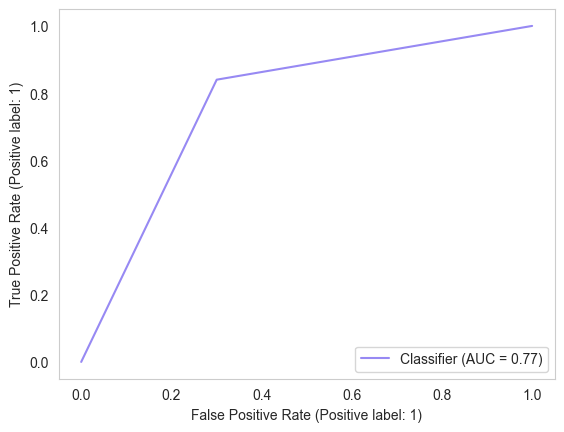

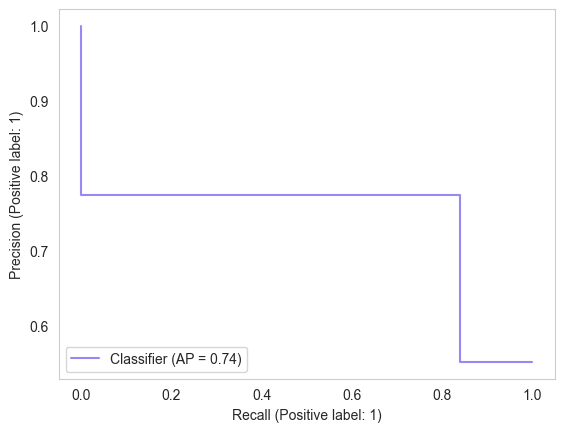

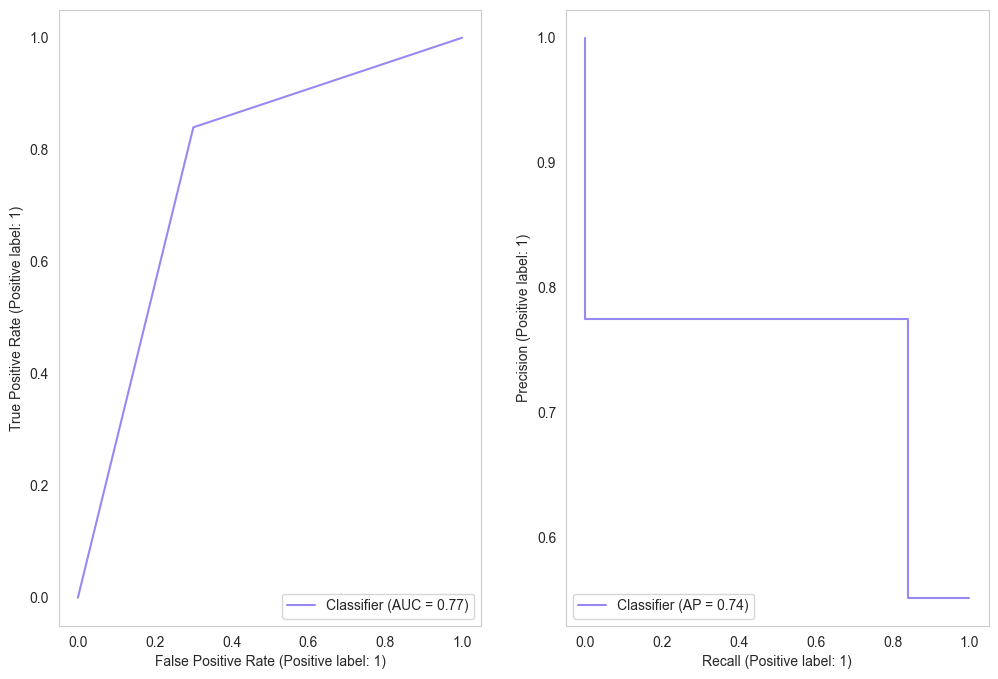

In [20]:
roc_display = RocCurveDisplay.from_predictions(y_true=y_test_fig, y_pred=y_pred_fig, pos_label=1, color='#9789f3')
pr_display = PrecisionRecallDisplay.from_predictions(y_true=y_test_fig, y_pred=y_pred_fig, pos_label=1, color='#9789f3')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1, color='#9789f3')
pr_display.plot(ax=ax2, color='#9789f3')
plt.savefig('rocauc_pr_rf_fig.png')

# Visualize Random Forest - Decision Boundary

## RF-WORD

C:\Users\maxha\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


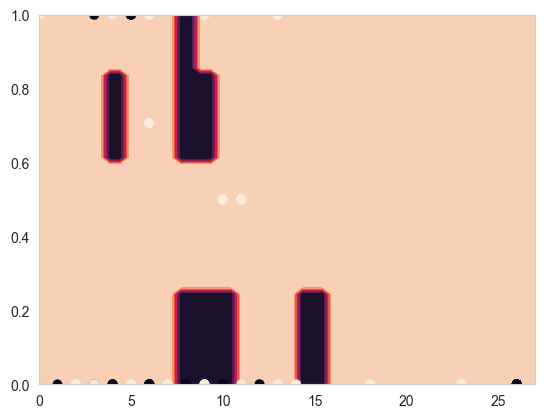

In [24]:
import numpy as np

model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=25, max_features='log2', n_estimators=50)
x_train_rf = x_train_word[['two_q_gram', 'metaphone3_four_cosine']]
x_test_rf = x_test_word[['two_q_gram', 'metaphone3_four_cosine']]

feature_1, feature_2 = np.meshgrid(
    np.linspace(x_train_rf['two_q_gram'].min(), x_train_rf['two_q_gram'].max()),
    np.linspace(x_train_rf['metaphone3_four_cosine'].min(), x_train_rf['metaphone3_four_cosine'].max())
)

model.fit(x_train_rf, y_train_word)

from sklearn.inspection import DecisionBoundaryDisplay

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred_word_rf = np.reshape(rf.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred_word_rf
)
display.plot()
display.ax_.scatter(
    x=x_test_rf['two_q_gram'], y=x_test_rf['metaphone3_four_cosine'], c=y_test_word
)
display.figure_.savefig('decision_boundary_rf_word_train.png')

## RF-FIG

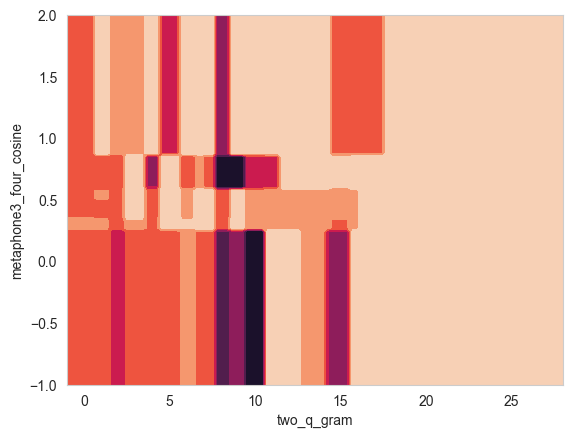

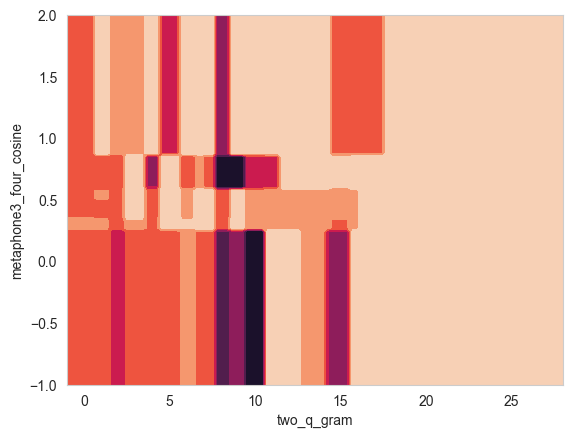

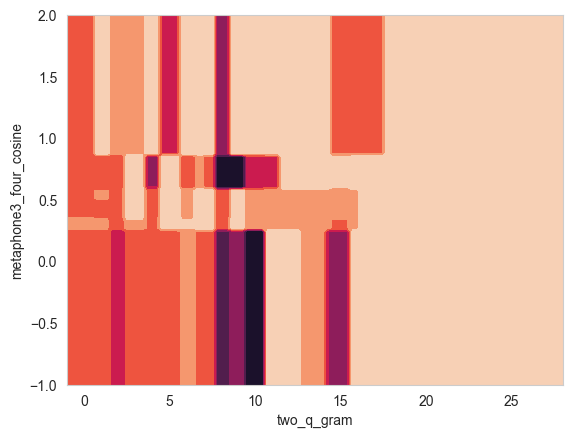

ValueError: n_features must be equal to 2. Got 3 instead.

ValueError: n_features must be equal to 2. Got 3 instead.

In [54]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=25, max_features='log2', n_estimators=50)
model.fit(x_train_fig_rf, y_train_fig)
display = DecisionBoundaryDisplay.from_estimator(model, x_train_fig_rf)

display.figure_.savefig('decision_boundary_rf_fig_train.png')

## SVM-WORD

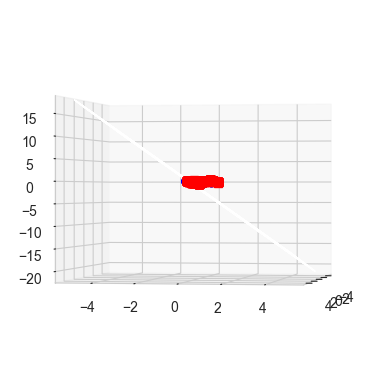

In [48]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

x_train_word_svm = x_train_word[['sorensen', 'metaphone3_lcs', 'conc_cos_wordnet', 'fasttext_it_sim']]
x_test_word_svm = x_test_word[['sorensen', 'metaphone3_lcs', 'conc_cos_wordnet', 'fasttext_it_sim']]

pca = PCA(n_components=3)
x_train_reduced = pca.fit_transform(x_train_word_svm)
x_test_reduced = pca.transform(x_test_word_svm)
svm_word = LinearSVC(dual='auto', C=0.01)

svm_word.fit(x_train_reduced, y_train_word)
#display = DecisionBoundaryDisplay.from_estimator(svm_word, x_test_reduced, response_method='predict', alpha=0.5)
#display.ax_.scatter(x_test_reduced[:, 0], x_test_reduced[:, 1], c=y_test_word, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.show()

clf = svm_word
X = x_test_reduced
Y = y_test_word

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(0, 10)
plt.show()

In [90]:
len(y_test_word)
differences = x_test_fig[['Case ID', 'Earlier Trademark', 'Contested Trademark', 'Earlier Goods and Services',
                           'Contested Goods and Services', 'resnet50_img_sim', 'conc_cos_wordnet', 'metaphone2_three_cosine',
                           'vgg19_img_sim', 'metaphone3_two_cosine', 'conc_lev_wordnet', 'google_it_sim', 'Outcome']]
differences['rf_pred'] = y_pred_fig
differences['svm_pred'] = y_pred_svm
differences = differences[y_pred_fig != y_pred_svm]
differences.to_csv('./fig_differences.csv', sep=',', encoding='utf-8', index=False)
all_samples = x_test_fig[['Case ID', 'Earlier Trademark', 'Contested Trademark', 'Earlier Goods and Services',
                          'Contested Goods and Services',
                          'vgg19_img_sim', 'metaphone3_two_cosine', 'conc_lev_wordnet', 'google_it_sim', 'Outcome']]

all_samples['svm_pred'] = y_pred_svm
all_samples.to_csv('./fig_svm_result_pred.csv', sep=',', encoding='utf-8', index=False)


outcome_dict = {}

for i, row in all_samples.iterrows():
    id = row['Case ID']
    if id not in outcome_dict:
        outcome_dict[id] = {}
    if row['svm_pred'] == 1:
        outcome_dict[id]['1'] = True
    else:
        outcome_dict[id]['0'] = True

outcome_dict

C:\Users\maxha\AppData\Local\Temp\ipykernel_18280\1868573371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences['rf_pred'] = y_pred_fig
C:\Users\maxha\AppData\Local\Temp\ipykernel_18280\1868573371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences['svm_pred'] = y_pred_svm
C:\Users\maxha\AppData\Local\Temp\ipykernel_18280\1868573371.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

{'003166032': {'0': True},
 '003179606': {'1': True},
 '003173330': {'0': True},
 '003172282': {'0': True},
 '003160412': {'0': True},
 '003138449': {'0': True},
 '003165437': {'1': True},
 '003172363': {'0': True},
 '003164205': {'1': True},
 '003167765': {'1': True},
 '003165300': {'1': True},
 '003170505': {'0': True},
 '003140708': {'1': True},
 '003174603': {'0': True},
 '003176855': {'0': True},
 '003176271': {'0': True},
 '003158922': {'1': True},
 '003169150': {'0': True},
 '003171788': {'0': True},
 '003142158': {'1': True},
 '003148917': {'0': True},
 '003146388': {'0': True},
 '003170480': {'0': True},
 '003174239': {'0': True},
 '003165848': {'0': True},
 '003167746': {'0': True},
 '003170851': {'0': True},
 '003173788': {'0': True},
 '003170330': {'0': True},
 '003153556': {'0': True},
 '003160319': {'0': True},
 '003160380': {'0': True},
 '003137596': {'1': True},
 '003146327': {'0': True},
 '003158450': {'0': True},
 '003170683': {'1': True},
 '003170664': {'1': True, '0